# GIS Analysis of Traffic Volume and Economic Indicators





Contributers:
- [Prabin Raj Shrestha](https://prbn.info/)
- Arunava Das
- Heeyoon Shin

---

---


In case of any issues running the code, please execute the code on google colab.

Link to a copy of this notbook on colab: https://colab.research.google.com/drive/13s7vgERpROjoGXtSvKKzOo3eU8Yfo1sp

<a href="https://colab.research.google.com/drive/13s7vgERpROjoGXtSvKKzOo3eU8Yfo1sp" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Table of Contents

* Introduction
* Project Goals
* Data Gathering
  * Datasets
  * Libraries
  * Data
  * Data Processing
* Exploration
  * Research Question 1
  * Research Question 2
* Timeseries Analysis
  * Research Question 3
* Conclusion
* Reference


---

# Introduction





We want to explore Traffic volume as an indicator for economic activity and forecasting future trends. The theory behind using traffic volume as an economic indicator is that changes in traffic volume on roads and highways can provide insight into consumer spending and production levels. This information can then be used to make predictions about the economy's health and identify potential economic turning points.

---

# Project Goals

**Research Quesions:**

1.	How does road traffic volume vary across different regions and cities, and what factors contribute to these variations?
2.	Is there a correlation between road traffic volume and economic indicators such as GDP, employment rates, and consumer spending?
3. Is there any event or change point in traffic volumes?

**Project Objectives and Research Quesions:**

1. Data Collection and Standardization:
* Gather traffic volume datasets from various sources, including government agencies, transportation departments, and open data portals.
* Process individual datasets to a standardized granularity level, ensuring consistency and comparability across different sources and regions.

2. Exploratory Analysis:
* Explore the relationship between road traffic volume and economic growth indicators, such as GDP, employment rates, and consumer spending, to identify potential correlations and insights.

3. Time Series Analysis:
* Perform time series analysis on traffic volume data to identify temporal patterns and trends.
* Examine the relationship between traffic volume and economic indicators over time, detecting any significant events or change points.
* Investigate the impact of external factors on traffic patterns and explore potential implications for urban planning, infrastructure development, and policy formulation.


---

# Data Gathering

**Acquiring Datasets for Analysis:**

In the initial phase of our project, we focused on gathering diverse datasets crucial for our analysis. These datasets encompass a wide range of information vital for our research objectives. Specifically, we procured datasets relating to:

* **Traffic Volume for Various State Counties:**

  Understanding traffic patterns is essential for numerous analyses, from urban planning to transportation efficiency. By acquiring data on traffic volume across different state counties, we aim to discern trends, identify congestion hotspots, and potentially correlate traffic patterns with other socio-economic factors.

* **Economic Indicators Datasets:**

  Economic indicators serve as fundamental metrics for gauging the economic health and vitality of regions. These datasets encompass a plethora of indicators, including GDP growth rates, employment figures, inflation rates, and more. By analyzing these indicators, we can gain insights into the economic landscape of various areas, identify disparities, and explore potential correlations with other variables.

* **Demographic Datasets:**

  Demographic data provides valuable insights into the composition and characteristics of populations within specific regions.



## Datasets

**Traffic Volume**
1. Portland Traffic Volume

  Link: https://shorturl.at/aiDJL

2. Virginia State Traffic Volume

  Link: https://shorturl.at/cIS89

3. New York State Traffic Volume

  Link: https://shorturl.at/yzDH4

**Econometric Data**
4. Market Hotness

  Link: https://fred.stlouisfed.org/series/MELIPRCOUNTY6059

5. Equifax Subprime Credit Population

  Link: https://fred.stlouisfed.org/series/EQFXSUBPRIME036061

6. Unemployment Rate

  Link: https://fred.stlouisfed.org/series/UNRATE

7. Annual Population

  Link: https://www.census.gov/popclock/


### Econometrics:

* *Market Hotness*:

  This term is not a standard econometric term, but it could refer to the level of activity or demand in a particular market. In econometrics, market conditions and factors influencing supply and demand are often analyzed using various models and data.

* *Subprime Credit*:

  Subprime credit refers to loans or credit extended to borrowers with lower credit scores or higher credit risk. Econometric models can be used to analyze the factors influencing subprime lending, default rates, and the impact on the overall economy.

* *Population*:

  Population data is often used in econometric studies to analyze demographic factors, labor force participation, consumer behavior, and other economic variables that are influenced by population characteristics.

* *Unemployment Rate*:

  The unemployment rate is a key economic indicator that measures the percentage of the labor force that is unemployed and actively seeking employment. Econometric models are used to study the determinants of unemployment, its impact on economic growth, and the effectiveness of policies aimed at reducing unemployment.

* *Annual Population*:

  Annual population data can be used in econometric studies to analyze population growth, migration patterns, and their impact on various economic factors, such as labor supply, housing demand, and consumer spending.

## Libraries

* Requests:
The Requests library is a powerful tool for making HTTP requests in Python. We'll utilize this library to interact with APIs provided by data sources, enabling us to programmatically retrieve datasets without manual intervention. Its intuitive interface and robust functionality make it an indispensable component of our data acquisition toolkit.

* Pandas:
Pandas is a versatile data manipulation and analysis library, renowned for its ease of use and efficiency. Once we've obtained the datasets, Pandas will be instrumental in performing data preprocessing, cleaning, and transformation tasks. Its extensive capabilities for handling structured data ensure that we can seamlessly integrate the acquired datasets into our analysis pipeline.

* Beautiful Soup:
Beautiful Soup is a Python library for parsing HTML and XML documents, facilitating web scraping tasks with ease. In scenarios where datasets are not directly available via APIs but are accessible on web pages, Beautiful Soup enables us to extract relevant data efficiently. Its robust parsing capabilities and flexibility empower us to navigate through HTML structures and extract desired information for further processing.

* numpy:
NumPy is a fundamental library for scientific computing in Python, providing support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently. In our project, NumPy will play a crucial role in numerical computations, statistical analysis, and array manipulation tasks, complementing Pandas for comprehensive data processing capabilities.

* gdown:
The gdown library is a convenient tool for downloading large files from Google Drive URLs directly to our local environment. This library simplifies the process of accessing datasets stored on Google Drive, offering a straightforward interface for downloading files with minimal hassle. By integrating gdown into our workflow, we ensure seamless access to remote datasets hosted on Google Drive repositories.

* full-fred:
The full-fred library provides access to the full range of economic data available through the Federal Reserve Economic Data (FRED) API. This comprehensive library facilitates the retrieval of diverse economic datasets, including macroeconomic indicators, financial market data, and regional economic statistics. By leveraging full-fred, we gain access to a wealth of economic data sources, enriching our analysis with robust and authoritative datasets from FRED.

* re:
The re (regular expression) module is a powerful tool for pattern matching and text processing in Python. It enables us to search, extract, and manipulate text data based on specified patterns or regular expressions. In our project, the re module will be invaluable for parsing and extracting relevant information from textual data sources, enhancing our data acquisition and preprocessing capabilities with advanced text processing functionalities.


---

## Data

In [ ]:
# @title Installing Libraries

# Below libraris are used to download data
!pip install gdown
!pip install full-fred

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 1.4 MB/s eta 0:00:00


In [ ]:
# @title Loading Libraries
import geopy
import pandas as pd
import numpy as np
import re

pd.set_option('display.max_columns', None)

Acquiring Data Through API:

For the datasets utilized in our analysis, we employed a combination of methods, including both API-based retrieval and manual download. after downloadin we uploaded the data on online storage. This approach allowed us to access a diverse range of data sources efficiently while ensuring accessibility and ease of use for subsequent analysis.

For datasets available through APIs, we developed Python notebooks specifically tailored to facilitate the retrieval process. These notebooks serve as dedicated tools for interacting with the respective APIs, enabling seamless data acquisition directly into our analysis environment.

Link to notbook: https://colab.research.google.com/drive/1ZchtORw3J5MAyw-bAQMdXMO1NyiVqcQL

<a href="https://colab.research.google.com/drive/1ZchtORw3J5MAyw-bAQMdXMO1NyiVqcQL" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [ ]:
# @title Download Data

# Traffic Volumn
!gdown https://drive.google.com/uc?id=1EoORaU5nThFey1bI0sNuOjBV3-jv4O-J -O IST_652_Project_data.zip
!unzip -o IST_652_Project_data.zip

Downloading...
From (original): https://drive.google.com/uc?id=1EoORaU5nThFey1bI0sNuOjBV3-jv4O-J
From (redirected): https://drive.google.com/uc?id=1EoORaU5nThFey1bI0sNuOjBV3-jv4O-J&confirm=t&uuid=c6ed289e-6822-43d0-9065-5c9888b8af01
To: /content/IST_652_Project_data.zip
100% 71.8M/71.8M [00:01<00:00, 49.6MB/s]
Archive:  IST_652_Project_data.zip
   creating: DATA/
  inflating: DATA/Market_Hotness_change_perc.csv  
  inflating: DATA/Equifax_Subprime_Credit_Population.csv  
  inflating: DATA/Market_Hotness.csv  
  inflating: DATA/New_York_Traffic_Volume_Counts.csv  
  inflating: DATA/Virginia_Traffic_Volume_Counts.csv  
  inflating: DATA/Civilian_Labor_Force.csv  
  inflating: DATA/Annual_Population.csv  
  inflating: DATA/Unemployment_Rate.csv  
  inflating: DATA/Portland_Traffic_Volume_Counts.csv  


In [ ]:
# @title Loading VIRGINIA Traffic Volume
# Traffic Volumn

# File name
data_fn = 'DATA/Virginia_Traffic_Volume_Counts.csv'

datatype_dict = {'OBJECTID': str
                , 'DATA_DATE': str
                , 'ROUTE_COMM': str
                , 'START_LABE': str
                , 'END_LABEL': str
                , 'ADT': int
                , 'ADT_QUALIT': str
                , 'PERCENT_4_': float
                , 'PERCENT_BU': float
                , 'PERCENT_TR': float
                , 'PERCENT__1': float
                , 'PERCENT__2': float
                , 'PERCENT__3': float
                , 'CLASS_QUAL': str
                , 'AAWDT': int
                , 'AAWDT_QUAL': str
                , 'FROM_JURIS': str
                , 'TO_JURISDI': str
                , 'ROUTE_NAME': str
                , 'FROM_DISTR': str
                , 'TO_DISTRIC': str
                , 'RTE_TYPE_C': str
                , 'Shape__Length': float
                , 'Shape__Length_2': float
                }

date_col_l = ['DATA_DATE']

# Load data
virginia_traffic_count_df = pd.read_csv(data_fn, dtype = datatype_dict)#, parse_dates = date_col_l)

# Display/Preview
display(virginia_traffic_count_df.sample(5))
# Info
virginia_traffic_count_df.info()

,OBJECTID,DATA_DATE,ROUTE_COMM,START_LABE,END_LABEL,ADT,ADT_QUALIT,PERCENT_4_,PERCENT_BU,PERCENT_TR,PERCENT__1,PERCENT__2,PERCENT__3,CLASS_QUAL,AAWDT,AAWDT_QUAL,FROM_JURIS,TO_JURISDI,ROUTE_NAME,FROM_DISTR,TO_DISTRIC,RTE_TYPE_C,Shape__Length,Shape__Length_2
71107,71108,2018/01/01 05:00:00+00,SC-620N (Carroll County),I-77,17-932 Kaywood Dr,790,G,95.78476,0.76233,1.74888,0.89687,0.80718,0.0,F,830,G,Carroll County,Carroll County,R-VA017SC00620NB,Salem,Salem,SC,0.003454,0.003454
102966,102967,2015/08/20 04:00:00+00,SC-1639E (Roanoke County),80-1637 Rasmont Rd,80-1638 Crest St,90,R,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,X,0,X,Roanoke County,Roanoke County,R-VA080SC01639EB,Salem,Salem,SC,0.001348,0.001348
14081,14082,2018/01/01 05:00:00+00,I-295W Dist/Coll at mp43,I-95-S084B FROM RT 95 SOUTH,I-295-W043C TO RT 1 NORTH,22000,A,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,X,23000,A,Henrico County,Henrico County,R-VA IS00295WB DCR043.00X,Richmond,Richmond,IS,0.003054,0.003054
6927,6928,2017/06/09 04:00:00+00,SC-719N (Lancaster County),Dead End,51-634 King Carter Dr,60,T,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,X,0,X,Lancaster County,Lancaster County,R-VA051SC00719NB,Fredericksburg,Fredericksburg,SC,0.004603,0.004603
93426,93427,2013/12/24 05:00:00+00,SC-2516N (Loudoun County),Cul-de-Sac,53-2514 Unison Knoll Circle,30,T,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,X,0,X,Loudoun County,Loudoun County,R-VA053SC02516NB,Northern Virginia,Northern Virginia,SC,0.000629,0.000629


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122063 entries, 0 to 122062
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   OBJECTID         122063 non-null  object 
 1   DATA_DATE        122063 non-null  object 
 2   ROUTE_COMM       122063 non-null  object 
 3   START_LABE       122063 non-null  object 
 4   END_LABEL        122063 non-null  object 
 5   ADT              122063 non-null  int64  
 6   ADT_QUALIT       122063 non-null  object 
 7   PERCENT_4_       122063 non-null  float64
 8   PERCENT_BU       122063 non-null  float64
 9   PERCENT_TR       122063 non-null  float64
 10  PERCENT__1       122063 non-null  float64
 11  PERCENT__2       122063 non-null  float64
 12  PERCENT__3       122063 non-null  float64
 13  CLASS_QUAL       122063 non-null  object 
 14  AAWDT            122063 non-null  int64  
 15  AAWDT_QUAL       122063 non-null  object 
 16  FROM_JURIS       122063 non-null  obje

In [ ]:
# @title Loading: Portland Traffic Volume
# Traffic Volumn

# File name
data_fn = 'DATA/Portland_Traffic_Volume_Counts.csv'

datatype_dict = {'X': float
                 , 'Y': float
                 , 'OBJECTID': str
                 , 'CountID': str
                 , 'ChannelID': int
                 , 'LocationDesc': str
                 , 'Bound': str
                 , 'StartDate': str
                 , 'StartDay': str
                 , 'StartTime': str
                 , 'EndDate': str
                 , 'EndDay': str
                 , 'EndTime': str
                 , 'ADTVolume': int
                 , 'AMVolume': int
                 , 'AMPkHrVol': int
                 , 'AMPkHrTime': str
                 , 'AMPkHrFactor': float
                 , 'PMVolume': int
                 , 'PMPkHrVol': int
                 , 'PMPkHrTime': str
                 , 'PMPkHrFactor': float
                 , 'ExceptType': str
                 , 'NumChannels': int
                 , 'ChannelNum': int
                 , 'Conditions': str
                 , 'Comment': str
                 , 'Duration': int
                 , 'IntervalLen': int
                 , 'DeviceRef': str
                 , 'LocationID': str
                 , 'LocationClass': str
                 , 'CountLocDesc': str
                 , 'CountType': str
                }

date_col_l = ['StartDate', 'EndDate']

# Load data
portland_traffic_count_df = pd.read_csv(data_fn, dtype = datatype_dict, parse_dates = date_col_l)

# Display/Preview
display(portland_traffic_count_df.sample(5))
# Info
portland_traffic_count_df.info()

,X,Y,OBJECTID,CountID,ChannelID,LocationDesc,Bound,StartDate,StartDay,StartTime,EndDate,EndDay,EndTime,ADTVolume,AMVolume,AMPkHrVol,AMPkHrTime,AMPkHrFactor,PMVolume,PMPkHrVol,PMPkHrTime,PMPkHrFactor,ExceptType,NumChannels,ChannelNum,Conditions,Comment,Duration,IntervalLen,DeviceRef,LocationID,LocationClass,CountLocDesc,CountType
13356,-1.365367e+07,5.695463e+06,13357,19073084B.VL1,521954,SE 13TH AVE S of BIDWELL ST,N,2019-07-30 00:00:00+00:00,TUE,08:00:00,2019-07-31 00:00:00+00:00,WED,13:45:00,58,16,6,2019/07/30 10:15:00+00,0.750,42,13,2019/07/30 16:45:00+00,0.650,Bike Count,1,1,NaN,ONLY BIKES @ 7851,120,15,NaN,LEG41807,NODELEG,SE 13TH AVE S of SE BIDWELL ST,VOLUME
19059,-1.364736e+07,5.699642e+06,19060,23010401.VL2,528291,SE 65TH AVE N OF CENTER ST,S,2023-01-04 00:00:00+00:00,WED,14:00:00,2023-01-06 00:00:00+00:00,FRI,11:45:00,193,54,13,2023/01/04 08:30:00+00,0.812,139,23,2023/01/04 17:15:00+00,0.821,Normal Weekday,2,2,NaN,@ 3732,184,15,NaN,LEG47624,NODELEG,SE 65TH AVE N of SE CENTER ST,VOLUME
1039,-1.365618e+07,5.702491e+06,1040,10081133.VL2,508054,SW NAITO PKY S of CLAY ST / HARBOR DR,S,2010-08-11 00:00:00+00:00,WED,12:00:00,2010-08-13 00:00:00+00:00,FRI,23:45:00,17199,4891,982,2010/08/11 11:00:00+00,0.889,12308,1715,2010/08/11 16:30:00+00,0.963,Normal Weekday,2,2,NaN,; StationID = SN:019796,240,15,0033,LEG72793,NODELEG,SW NAITO PKY S/SW CLAY ST,VOLUME
18922,-1.365594e+07,5.703124e+06,18923,22112941.VL2,528112,SW NAITO PKY S OF TAYLOR ST,S,2022-11-29 00:00:00+00:00,TUE,13:00:00,2022-12-01 00:00:00+00:00,THU,11:45:00,418,169,35,2022/11/29 07:15:00+00,0.795,249,63,2022/11/29 16:45:00+00,0.788,Normal Weekday,2,2,NaN,WITH BIKES,188,15,NaN,LEG72777,NODELEG,SW NAITO PKWY S of SW TAYLOR ST,VOLUME
11600,-1.363629e+07,5.700841e+06,11601,18051705.VL1,520484,SE 162ND AVE S of TAGGART ST,N,2018-05-17 00:00:00+00:00,THU,13:15:00,2018-05-18 00:00:00+00:00,FRI,15:15:00,5151,1985,410,2018/05/17 07:00:00+00,0.827,3166,409,2018/05/17 16:45:00+00,0.947,Normal Weekday,1,1,NaN,NaN,105,15,NaN,LEG42735,NODELEG,SE 162ND AVE S of SE TAGGART ST,VOLUME


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21478 entries, 0 to 21477
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   X              21478 non-null  float64            
 1   Y              21478 non-null  float64            
 2   OBJECTID       21478 non-null  object             
 3   CountID        21478 non-null  object             
 4   ChannelID      21478 non-null  int64              
 5   LocationDesc   21478 non-null  object             
 6   Bound          21478 non-null  object             
 7   StartDate      21478 non-null  datetime64[ns, UTC]
 8   StartDay       21478 non-null  object             
 9   StartTime      21478 non-null  object             
 10  EndDate        21478 non-null  datetime64[ns, UTC]
 11  EndDay         21478 non-null  object             
 12  EndTime        21478 non-null  object             
 13  ADTVolume      21478 non-null  int64          

In [ ]:
# @title Loading NEW YORK Traffic Volume
# Traffic Volumn

# File name
data_fn = 'DATA/New_York_Traffic_Volume_Counts.csv'

datatype_dict = {'Year': int
                , 'Station ID': str
                , 'County': str
                , 'Signing': str
                , 'State Route': str
                , 'County Road': str
                , 'Road Name': str
                , 'Beginning Description': str
                , 'Ending Description': str
                , 'Municipality': str
                , 'Length': int
                , 'Functional Class': str
                , 'Ramp': str
                , 'Bridge': str
                , 'Railroad Crossing': str
                , 'One Way': str
                , 'Count': float
                }

date_col_l = ['DATA_DATE']

datatype_dict = {}

# Load data
ny_traffic_count_df = pd.read_csv(data_fn, dtype = datatype_dict)#, parse_dates = date_col_l)

# Display/Preview
display(ny_traffic_count_df.sample(5))
# Info
ny_traffic_count_df.info()

,Year,Station ID,County,Signing,State Route,County Road,Road Name,Beginning Description,Ending Description,Municipality,Length,Functional Class,Ramp,Bridge,Railroad Crossing,One Way,Count
500313,2011,165041,Schenectady,NaN,NaN,NaN,ORCHARD ST,NY5S MAIN ST,DEAD END,Rotterdam,14,19,NaN,NaN,NaN,NaN,NaN
13083,2019,75535,Suffolk,NaN,NaN,NaN,JOHNSON AVE,DEAD END,NICOLLS RD,Babylon,15,19,NaN,NaN,NaN,NaN,121.0
1810027,1989,12200,Bronx,NaN,NaN,NaN,LONGFELLOW AVE,HUNTS POINT AVE,DEAD END,Bronx,64,19,NaN,NaN,NaN,NaN,NaN
2470903,1979,933027,Delaware,NaN,NaN,NaN,I88 Exit 9 NY 8,I-88 WB (OFF),NY 8,Sidney,47,11,Y,NaN,NaN,Y,NaN
105969,2018,733032,Jefferson,NaN,NaN,NaN,I81 Exit 44,NY 232,I-81 NB (ON),Watertown,29,11,Y,NaN,NaN,Y,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593803 entries, 0 to 2593802
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   int64  
 1   Station ID             int64  
 2   County                 object 
 3   Signing                object 
 4   State Route            object 
 5   County Road            object 
 6   Road Name              object 
 7   Beginning Description  object 
 8   Ending Description     object 
 9   Municipality           object 
 10  Length                 int64  
 11  Functional Class       int64  
 12  Ramp                   object 
 13  Bridge                 object 
 14  Railroad Crossing      object 
 15  One Way                object 
 16  Count                  float64
dtypes: float64(1), int64(4), object(12)
memory usage: 336.4+ MB


In [ ]:
# @title Loading: Civilian Labor Force
# Traffic Volumn

# File name
data_fn = 'DATA/Civilian_Labor_Force.csv'

datatype_dict = {'date': str
                 , 'year': int
                 , 'quarter': int
                 , 'month': int
                 , 'country': str
                 , 'region': str
                 , 'state': str
                 , 'county': str
                 , 'code': str
                }

date_col_l = ['date']

# Load data
civilian_labor_force_df = pd.read_csv(data_fn, dtype = datatype_dict, parse_dates = date_col_l, na_values=None)

# Transfoemation
civilian_labor_force_df = civilian_labor_force_df[civilian_labor_force_df['Civilian_Labor_Force']!='.']
civilian_labor_force_df['Civilian_Labor_Force'] = civilian_labor_force_df['Civilian_Labor_Force'].astype(int)
civilian_labor_force_df = civilian_labor_force_df.dropna()

# Display/Preview
display(civilian_labor_force_df.sample(5))
# Info
civilian_labor_force_df.info()

<ipython-input-7-e9137a68955f>:21: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  civilian_labor_force_df = pd.read_csv(data_fn, dtype = datatype_dict, parse_dates = date_col_l, na_values=None)


,date,year,quarter,month,country,region,state,county,code,Civilian_Labor_Force
33431,2008-06-01,2008,2,6,USA,"Asotin County, WA",WA,Asotin County,53003,10374
857917,2006-06-01,2006,2,6,USA,"Brooks County, GA",GA,Brooks County,13027,8471
564414,2011-03-01,2011,1,3,USA,"Rockingham County, NC",NC,Rockingham County,37157,43838
330409,2019-12-01,2019,4,12,USA,"Iowa County, IA",IA,Iowa County,19095,10696
799384,2014-07-01,2014,3,7,USA,"Lee County, SC",SC,Lee County,45061,6541


<class 'pandas.core.frame.DataFrame'>
Index: 1285672 entries, 0 to 1285741
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   date                  1285672 non-null  datetime64[ns]
 1   year                  1285672 non-null  int64         
 2   quarter               1285672 non-null  int64         
 3   month                 1285672 non-null  int64         
 4   country               1285672 non-null  object        
 5   region                1285672 non-null  object        
 6   state                 1285672 non-null  object        
 7   county                1285672 non-null  object        
 8   code                  1285672 non-null  object        
 9   Civilian_Labor_Force  1285672 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 107.9+ MB


In [ ]:
# @title Loading Unemployment Rate
# Traffic Volumn

# File name
data_fn = 'DATA/Unemployment_Rate.csv'

datatype_dict = {'date': str
                 , 'year': int
                 , 'quarter': int
                 , 'month': int
                 , 'country': str
                 , 'region': str
                 , 'state': str
                 , 'county': str
                 , 'code': str
                #  , 'unemployment_rate': float
                }

date_col_l = ['date']

# Load data
unemployment_rate_df = pd.read_csv(data_fn, dtype = datatype_dict, parse_dates = date_col_l, na_values=None)
# unemployment_rate_df = unemployment_rate_df.rename(columns = rename_dict)

# Transformation
unemployment_rate_df = unemployment_rate_df[unemployment_rate_df['unemployment_rate']!='.']
unemployment_rate_df['unemployment_rate'] = unemployment_rate_df['unemployment_rate'].astype(float)
unemployment_rate_df = unemployment_rate_df.dropna()

# Display/Preview
display(unemployment_rate_df.sample(5))
# Info
unemployment_rate_df.info()

<ipython-input-8-e2e200c952b3>:22: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  unemployment_rate_df = pd.read_csv(data_fn, dtype = datatype_dict, parse_dates = date_col_l, na_values=None)
<ipython-input-8-e2e200c952b3>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment_rate_df['unemployment_rate'] = unemployment_rate_df['unemployment_rate'].astype(float)


,date,year,quarter,month,country,region,state,county,code,unemployment_rate
1153176,1998-11-01,1998,4,11,USA,"Valencia County, NM",NM,Valencia County,35061,4.9
938434,2007-01-01,2007,1,1,USA,"Morgan County, AL",AL,Morgan County,01103,4.1
322758,1997-05-01,1997,2,5,USA,"O'Brien County, IA",IA,O'Brien County,19141,1.7
57339,2019-02-01,2019,1,2,USA,"Cherokee County, TX",TX,Cherokee County,48073,4.0
636248,2018-03-01,2018,1,3,USA,"Ohio County, IN",IN,Ohio County,18115,3.6


<class 'pandas.core.frame.DataFrame'>
Index: 1285840 entries, 0 to 1285909
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   date               1285840 non-null  datetime64[ns]
 1   year               1285840 non-null  int64         
 2   quarter            1285840 non-null  int64         
 3   month              1285840 non-null  int64         
 4   country            1285840 non-null  object        
 5   region             1285840 non-null  object        
 6   state              1285840 non-null  object        
 7   county             1285840 non-null  object        
 8   code               1285840 non-null  object        
 9   unemployment_rate  1285840 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 107.9+ MB


In [ ]:
# @title Loading Market Hotness
# Traffic Volumn

# Market_Hotness.csv
# Market_Hotness_change_perc.csv
# Annual_Population.csv

# File name
data_fn = 'DATA/Market_Hotness.csv'

datatype_dict = {'date': str
                 , 'year': int
                 , 'quarter': int
                 , 'month': int
                 , 'country': str
                 , 'region': str
                 , 'state': str
                 , 'county': str
                 , 'code': str
                #  , 'market_hotness': float
                }

date_col_l = ['date']

# Load data
market_hotness_df = pd.read_csv(data_fn, dtype = datatype_dict, parse_dates = date_col_l, na_values=None)
# unemployment_rate_df = unemployment_rate_df.rename(columns = rename_dict)

# Transfoemation
market_hotness_df = market_hotness_df[market_hotness_df['market_hotness']!='.']
market_hotness_df['market_hotness'] = market_hotness_df['market_hotness'].astype(float)
market_hotness_df = market_hotness_df.dropna()

# Display/Preview
display(market_hotness_df.sample(5))
# Info
market_hotness_df.info()

,date,year,quarter,month,country,region,state,county,code,market_hotness
74728,2020-08-01,2020,3,8,USA,"Tom Green County, TX",TX,Tom Green County,48451,267900.0
81607,2020-05-01,2020,2,5,USA,"New York County, NY",NY,New York County,36061,1750000.0
5091,2022-04-01,2022,2,4,USA,"Bulloch County, GA",GA,Bulloch County,13031,290000.0
91496,2022-12-01,2022,4,12,USA,"Caldwell County, NC",NC,Caldwell County,37027,299500.0
85589,2018-12-01,2018,4,12,USA,"Dodge County, WI",WI,Dodge County,55027,199900.0


<class 'pandas.core.frame.DataFrame'>
Index: 79600 entries, 13 to 92534
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            79600 non-null  datetime64[ns]
 1   year            79600 non-null  int64         
 2   quarter         79600 non-null  int64         
 3   month           79600 non-null  int64         
 4   country         79600 non-null  object        
 5   region          79600 non-null  object        
 6   state           79600 non-null  object        
 7   county          79600 non-null  object        
 8   code            79600 non-null  object        
 9   market_hotness  79600 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 6.7+ MB


In [ ]:
# @title Loading: Market Hotness Change
# Traffic Volumn

# File name
data_fn = 'DATA/Market_Hotness_change_perc.csv'

datatype_dict = {'date': str
                 , 'year': int
                 , 'quarter': int
                 , 'month': int
                 , 'country': str
                 , 'region': str
                 , 'state': str
                 , 'county': str
                 , 'code': str
                #  , 'market_hotness_prec_change': float
                }

date_col_l = ['date']

# Load data
market_hotness_chnage_perc_df = pd.read_csv(data_fn, dtype = datatype_dict, parse_dates = date_col_l, na_values=None)

# Transfoemation
market_hotness_chnage_perc_df = market_hotness_chnage_perc_df[market_hotness_chnage_perc_df['market_hotness_prec_change']!='.']
market_hotness_chnage_perc_df['market_hotness'] = market_hotness_chnage_perc_df['market_hotness_prec_change'].astype(float)
market_hotness_chnage_perc_df = market_hotness_chnage_perc_df.dropna()

# Display/Preview
display(market_hotness_chnage_perc_df.sample(5))
# Info
market_hotness_chnage_perc_df.info()

<ipython-input-10-01ac9d3dc128>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_hotness_chnage_perc_df['market_hotness'] = market_hotness_chnage_perc_df['market_hotness_prec_change'].astype(float)


,date,year,quarter,month,country,region,state,county,code,market_hotness_prec_change,market_hotness
8401,2022-05-01,2022,2,5,USA,"Mobile County, AL",AL,Mobile County,01097,7.510448,7.510448
79002,2019-10-01,2019,4,10,USA,"Monroe County, PA",PA,Monroe County,42089,1.1303076,1.130308
53475,2018-10-01,2018,4,10,USA,"Surry County, NC",NC,Surry County,37171,-5.371248,-5.371248
53140,2017-11-01,2017,4,11,USA,"Caldwell County, NC",NC,Caldwell County,37027,3.9316982,3.931698
14112,2019-01-01,2019,1,1,USA,"Forrest County, MS",MS,Forrest County,28035,1.656051,1.656051


<class 'pandas.core.frame.DataFrame'>
Index: 79600 entries, 1 to 80594
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        79600 non-null  datetime64[ns]
 1   year                        79600 non-null  int64         
 2   quarter                     79600 non-null  int64         
 3   month                       79600 non-null  int64         
 4   country                     79600 non-null  object        
 5   region                      79600 non-null  object        
 6   state                       79600 non-null  object        
 7   county                      79600 non-null  object        
 8   code                        79600 non-null  object        
 9   market_hotness_prec_change  79600 non-null  object        
 10  market_hotness              79600 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memor

In [ ]:
# @title Loading: Annual Population

# File name
data_fn = 'DATA/Annual_Population.csv'

datatype_dict = {'date': str
                 , 'year': int
                 , 'quarter': int
                 , 'month': int
                 , 'country': str
                 , 'region': str
                 , 'state': str
                 , 'county': str
                 , 'code': str
                #  , 'population_annual': float
                }

date_col_l = ['date']

# Load data
annual_population_df = pd.read_csv(data_fn, dtype = datatype_dict, parse_dates = date_col_l, na_values=None)

# Transformation
annual_population_df = annual_population_df[annual_population_df['population_annual']!='.']
annual_population_df['population_annual'] = annual_population_df['population_annual'].astype(float)
annual_population_df = annual_population_df.dropna()

# Display/Preview
display(annual_population_df.sample(5))
# Info
annual_population_df.info()

,date,year,country,region,state,county,code,population_annual
134275,2017-01-01,2017,USA,"Washington County, AL",AL,Washington County,01129,16.484
65566,1976-01-01,1976,USA,"Hamilton County, TX",TX,Hamilton County,48193,7.700
157055,2009-01-01,2009,USA,"Madison County, ID",ID,Madison County,16065,38.218
93542,1980-01-01,1980,USA,"Madison County, TN",TN,Madison County,47113,74.546
81161,2019-01-01,2019,USA,"Bosque County, TX",TX,Bosque County,48035,18.594


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168778 entries, 0 to 168777
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date               168778 non-null  datetime64[ns]
 1   year               168778 non-null  int64         
 2   country            168778 non-null  object        
 3   region             168778 non-null  object        
 4   state              168778 non-null  object        
 5   county             168778 non-null  object        
 6   code               168778 non-null  object        
 7   population_annual  168778 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 10.3+ MB


In [ ]:
# @title Loading: Equifax Subprime Credit Population

# File name
data_fn = 'DATA/Equifax_Subprime_Credit_Population.csv'

datatype_dict = {'date': str
                 , 'year': int
                 , 'quarter': int
                 , 'month': int
                 , 'country': str
                 , 'region': str
                 , 'state': str
                 , 'county': str
                 , 'code': str
                #  , 'Equifax_Subprime_Credit_Population': float
                }

date_col_l = ['date']

# Load data
equifax_df = pd.read_csv(data_fn, dtype = datatype_dict, parse_dates = date_col_l, na_values=None)

# Transformation
equifax_df = equifax_df[equifax_df['Equifax_Subprime_Credit_Population']!='.']
equifax_df['Equifax_Subprime_Credit_Population'] = equifax_df['Equifax_Subprime_Credit_Population'].astype(float)
equifax_df = equifax_df.dropna()

# Display/Preview
display(equifax_df.sample(5))
# Info
equifax_df.info()


<ipython-input-12-cb2846e4994e>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  equifax_df['Equifax_Subprime_Credit_Population'] = equifax_df['Equifax_Subprime_Credit_Population'].astype(float)


,date,year,quarter,country,region,state,county,code,Equifax_Subprime_Credit_Population
120750,2023-04-01,2023,2,USA,"Hutchinson County, TX",TX,Hutchinson County,48233,30.717489
249760,2023-10-01,2023,4,USA,"Chelan County, WA",WA,Chelan County,53007,13.498313
92925,2017-01-01,2017,1,USA,"Storey County, NV",NV,Storey County,32029,19.170984
44644,2021-10-01,2021,4,USA,"Lowndes County, GA",GA,Lowndes County,13185,36.888112
85426,2017-04-01,2017,2,USA,"Ellsworth County, KS",KS,Ellsworth County,20053,27.631579


<class 'pandas.core.frame.DataFrame'>
Index: 122092 entries, 61 to 312854
Data columns (total 9 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   date                                122092 non-null  datetime64[ns]
 1   year                                122092 non-null  int64         
 2   quarter                             122092 non-null  int64         
 3   country                             122092 non-null  object        
 4   region                              122092 non-null  object        
 5   state                               122092 non-null  object        
 6   county                              122092 non-null  object        
 7   code                                122092 non-null  object        
 8   Equifax_Subprime_Credit_Population  122092 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 9.3+ MB


---

## Data Processing

The dataset contains traffic volume counts with multiple columns, including spatial data (X, Y coordinates), identification fields (OBJECTID, CountID, ChannelID), location descriptions, date and time fields for the start of the count, traffic volume and direction, and additional metadata like conditions and comments. Some columns might not be relevant for every analysis and might require cleaning or transformation for better usability. Let's perform three cleaning and transforming approaches:

1. **Handling Missing Values:** We'll check for missing values in crucial columns and decide on a strategy to handle them, such as filling with a default value or dropping rows/columns.

2. **Date and Time Parsing:** We'll convert the StartDate and StartTime fields from string to datetime objects to facilitate time-series analysis or filtering based on dates/times.

3. **Exploring and Encoding Categories:** For a categorical column like Bound, which indicates direction, we'll explore its unique values and apply one-hot encoding to transform these categories into a format that can be easily used for machine learning or analytical purposes.

### Handling Missing Values

In [ ]:
#check for missing values in each column
missing_values = portland_traffic_count_df.isnull().sum()

#filter columns that have missing values
missing_values = missing_values[missing_values > 0]

missing_values

Conditions    21478
Comment        2361
DeviceRef     15004
dtype: int64

The dataset has missing values in three columns: **Conditions (21,478 missing)**, **Comment (2,361 missing)**, and **DeviceRef (15,004 missing**. We will address these missing values with the following strategies:

1. **Conditions:** Assuming this column provides additional context for the traffic count, its absence might not significantly impact basic traffic analysis. We'll fill missing values with the string "Unknown".

2. **Comment:** Similar to Conditions, missing comments may not be critical for numerical analysis but useful for qualitative insights. We'll fill these missing values with "No comment".

3. **DeviceRef:** This seems like an identifier for the device used for counting. Missing values here might indicate data collection issues or unrecorded devices. We'll fill missing values with "Unknown Device".

In [ ]:
#fill missing values with specified values
portland_traffic_count_df['Conditions'] = portland_traffic_count_df['Conditions'].fillna('Unknown')
portland_traffic_count_df['Comment'] = portland_traffic_count_df['Comment'].fillna('No comment')
portland_traffic_count_df['DeviceRef'] = portland_traffic_count_df['DeviceRef'].fillna('Unknown Device')

#verify the changes by checking missing values again
missing_values_after = portland_traffic_count_df[['Conditions', 'Comment', 'DeviceRef']].isnull().sum()

missing_values_after

Conditions    0
Comment       0
DeviceRef     0
dtype: int64

The missing values in the Conditions, Comment, and DeviceRef columns have been successfully addressed, with each of these columns now having no missing values.

### Date and Time Parsing

We will now convert the StartDate and StartTime fields from strings to datetime objects to simplify date and time operations in later analyses. This will enable us to filter the data based on specific dates or times and perform time-series analysis more effectively.

In [ ]:
#convert 'StartDate' to datetime format (ignoring the timezone information for simplicity)
portland_traffic_count_df['StartDate'] = pd.to_datetime(portland_traffic_count_df['StartDate'])

portland_traffic_count_df['Start_Year'] = portland_traffic_count_df['StartDate'].dt.year
portland_traffic_count_df['Start_Quarter'] = portland_traffic_count_df['StartDate'].dt.quarter
portland_traffic_count_df['Start_Month'] = portland_traffic_count_df['StartDate'].dt.month
portland_traffic_count_df['Start_Day'] = portland_traffic_count_df['StartDate'].dt.day

portland_traffic_count_df['StartDate'] = portland_traffic_count_df['StartDate'].dt.date

#combine 'StartDate' and 'StartTime' into a single datetime column
portland_traffic_count_df['DateTime'] = pd.to_datetime(portland_traffic_count_df['StartDate'].astype(str) + ' ' + portland_traffic_count_df['StartTime'])

#verify the changes by displaying the types of these columns and the first few rows of the new 'DateTime' column
portland_traffic_count_df.dtypes[['StartDate', 'StartTime', 'DateTime']], portland_traffic_count_df['DateTime'].head()

(StartDate            object
 StartTime            object
 DateTime     datetime64[ns]
 dtype: object,
 0   2010-01-04 11:15:00
 1   2010-01-04 11:15:00
 2   2010-01-04 12:30:00
 3   2010-01-04 12:30:00
 4   2010-01-04 13:00:00
 Name: DateTime, dtype: datetime64[ns])

The **StartDate** has been successfully converted to a date object, and together with **StartTime**, they have been combined into a new **DateTime** column of datetime type. This transformation facilitates operations that require date and time information, such as **filtering and time-series analysis**.

---

---

### Aggregating counts

In [ ]:
# Group by columns
# Grouping by date and summing the traffic volume
group_col_l = ['Start_Year', 'Start_Quarter', 'Start_Month', 'Start_Day']

# Data
portland_traffic_volume_df = portland_traffic_count_df.copy()

# only Volume
portland_traffic_volume_df = portland_traffic_volume_df[portland_traffic_volume_df['CountType']=='VOLUME']

# daily
portland_traffic_volume_df = portland_traffic_volume_df.groupby(group_col_l).agg(volume = ('PMVolume', 'sum')
                                , duration = ('Duration', 'sum')).reset_index()

# Volume per day
portland_traffic_volume_df['vol_per_day'] = (portland_traffic_volume_df['volume']/portland_traffic_volume_df['duration'])*24

# monthly
# Grouping by month and averaging the traffic volume
group_col_l = ['Start_Year', 'Start_Quarter', 'Start_Month']

# rename
rename_dict = {'Start_Year': 'Year', 'Start_Quarter': 'Quarter', 'Start_Month': 'Month'}

# Group by
portland_traffic_volume_df = portland_traffic_volume_df.groupby(group_col_l).agg(vol_per_day = ('vol_per_day', 'mean')).reset_index()

# Rename columns
portland_traffic_volume_df = portland_traffic_volume_df.rename(columns = rename_dict)

# City State
portland_traffic_volume_df['Country'] = 'USA'
portland_traffic_volume_df['City'] = 'Portland'
portland_traffic_volume_df['County'] = 'Multnomah County'
portland_traffic_volume_df['State'] = 'OR'

# Display
portland_traffic_volume_df.head()

,Year,Quarter,Month,vol_per_day,Country,City,County,State
0,2010,1,1,419.334450,USA,Portland,Multnomah County,OR
1,2010,1,2,260.972147,USA,Portland,Multnomah County,OR
2,2010,1,3,199.735694,USA,Portland,Multnomah County,OR
3,2010,2,4,323.052798,USA,Portland,Multnomah County,OR
4,2010,2,5,170.174368,USA,Portland,Multnomah County,OR


---

### Virginia

Performing similar operation for counties in virginia

In [ ]:
# @title Columns

virginia_traffic_count_2_df = virginia_traffic_count_df.copy()
virginia_traffic_count_2_df['County'] = virginia_traffic_count_2_df['FROM_JURIS']#.apply(lambda x: re.sub(r'\bCounty\b', '', x))
virginia_traffic_count_2_df['State'] = 'VA'
virginia_traffic_count_2_df['Country'] = 'USA'

# virginia_traffic_count_2_df = virginia_traffic_count_2_df[col_l]

virginia_traffic_count_2_df.head()

,OBJECTID,DATA_DATE,ROUTE_COMM,START_LABE,END_LABEL,ADT,ADT_QUALIT,PERCENT_4_,PERCENT_BU,PERCENT_TR,PERCENT__1,PERCENT__2,PERCENT__3,CLASS_QUAL,AAWDT,AAWDT_QUAL,FROM_JURIS,TO_JURISDI,ROUTE_NAME,FROM_DISTR,TO_DISTRIC,RTE_TYPE_C,Shape__Length,Shape__Length_2,County,State,Country
0,1,2014/06/03 04:00:00+00,SC-678N (Appomattox County),WCL Pamplin; 06-1110,Dead End,60,R,0.0,0.0,0.0,0.0,0.0,0.0,X,0,X,Appomattox County,Appomattox County,R-VA006SC00678NB,Lynchburg,Lynchburg,SC,0.005767,0.005767,Appomattox County,VA,USA
1,2,2013/05/30 04:00:00+00,SC-1202N (Amherst County),05-657 Cedar Gate Rd,05-1211 Pinecone Ct,80,R,0.0,0.0,0.0,0.0,0.0,0.0,X,0,X,Amherst County,Amherst County,R-VA005SC01202NB,Lynchburg,Lynchburg,SC,0.002267,0.002267,Amherst County,VA,USA
2,3,2017/10/18 04:00:00+00,SC-639E (Accomack County),US 13 Lankford Hwy,01-625 Big Farm Rd,1200,R,0.0,0.0,0.0,0.0,0.0,0.0,X,0,X,Accomack County,Accomack County,R-VA001SC00639EB,Hampton Roads,Hampton Roads,SC,0.009233,0.009233,Accomack County,VA,USA
3,4,2017/08/22 04:00:00+00,SC-1610N (Accomack County),01-731 Forest St,01-1602 Church St,70,R,0.0,0.0,0.0,0.0,0.0,0.0,X,0,X,Accomack County,Accomack County,R-VA001SC01610NB,Hampton Roads,Hampton Roads,SC,0.001813,0.001813,Accomack County,VA,USA
4,5,2013/03/12 04:00:00+00,SC-609N (Brunswick County),12-712 Old Stage Rd,12-633 Robin Rd,150,R,0.0,0.0,0.0,0.0,0.0,0.0,X,0,X,Brunswick County,Brunswick County,R-VA012SC00609NB,Richmond,Richmond,SC,0.048762,0.048762,Brunswick County,VA,USA


In [ ]:
# @title Dates

virginia_traffic_count_3_df = virginia_traffic_count_2_df.copy()

# convert 'StartDate' to datetime format (ignoring the timezone information for simplicity)
virginia_traffic_count_3_df['StartDate'] = pd.to_datetime(virginia_traffic_count_3_df['DATA_DATE'])

virginia_traffic_count_3_df['Start_Year'] = virginia_traffic_count_3_df['StartDate'].dt.year
virginia_traffic_count_3_df['Start_Quarter'] = virginia_traffic_count_3_df['StartDate'].dt.quarter
virginia_traffic_count_3_df['Start_Month'] = virginia_traffic_count_3_df['StartDate'].dt.month
virginia_traffic_count_3_df['Start_Day'] = virginia_traffic_count_3_df['StartDate'].dt.day


virginia_traffic_count_3_df['StartTime'] = virginia_traffic_count_3_df['StartDate'].dt.time
virginia_traffic_count_3_df['StartDate'] = virginia_traffic_count_3_df['StartDate'].dt.date


#combine 'StartDate' and 'StartTime' into a single datetime column
virginia_traffic_count_3_df['DateTime'] = pd.to_datetime(virginia_traffic_count_3_df['StartDate'].astype(str) + ' ' + virginia_traffic_count_3_df['StartTime'].astype(str))

#verify the changes by displaying the types of these columns and the first few rows of the new 'DateTime' column
virginia_traffic_count_3_df.dtypes[['StartDate', 'StartTime', 'DateTime']]

# Required columns
col_l = ['StartDate', 'Start_Year', 'Start_Quarter', 'Start_Month', 'Start_Day', 'StartTime', 'DateTime', 'County', 'State', 'Country', 'ADT']
virginia_traffic_count_3_df = virginia_traffic_count_3_df[col_l]

# Display
virginia_traffic_count_3_df.head()

,StartDate,Start_Year,Start_Quarter,Start_Month,Start_Day,StartTime,DateTime,County,State,Country,ADT
0,2014-06-03,2014,2,6,3,04:00:00,2014-06-03 04:00:00,Appomattox County,VA,USA,60
1,2013-05-30,2013,2,5,30,04:00:00,2013-05-30 04:00:00,Amherst County,VA,USA,80
2,2017-10-18,2017,4,10,18,04:00:00,2017-10-18 04:00:00,Accomack County,VA,USA,1200
3,2017-08-22,2017,3,8,22,04:00:00,2017-08-22 04:00:00,Accomack County,VA,USA,70
4,2013-03-12,2013,1,3,12,04:00:00,2013-03-12 04:00:00,Brunswick County,VA,USA,150


In [ ]:
# @title Aggregating

# Group by columns
# Grouping by date and summing the traffic volume
loc_col_l = ['County', 'State', 'Country']
group_col_l = ['Start_Year', 'Start_Quarter', 'Start_Month', 'Start_Day'] + loc_col_l

# Data
virginia_traffic_volume_df = virginia_traffic_count_3_df.copy()

# daily
virginia_traffic_volume_df = virginia_traffic_volume_df.groupby(group_col_l).agg(vol_per_day = ('ADT', 'sum')).reset_index()

# monthly
# Grouping by month and averaging the traffic volume
group_col_l = ['Start_Year', 'Start_Quarter', 'Start_Month'] + loc_col_l

# rename
rename_dict = {'Start_Year': 'Year', 'Start_Quarter': 'Quarter', 'Start_Month': 'Month'}

# Group by
virginia_traffic_volume_df = virginia_traffic_volume_df.groupby(group_col_l).agg(vol_per_day = ('vol_per_day', 'mean')).reset_index()

# Rename columns
virginia_traffic_volume_df = virginia_traffic_volume_df.rename(columns = rename_dict)

# Display
virginia_traffic_volume_df.head()

,Year,Quarter,Month,County,State,Country,vol_per_day
0,1986,1,1,Augusta County,VA,USA,1680.0
1,1986,1,1,Buchanan County,VA,USA,50.0
2,1986,1,1,City of Suffolk,VA,USA,220.0
3,1986,1,1,Fairfax County,VA,USA,43156.0
4,1986,1,1,Loudoun County,VA,USA,4800.0


---

---

### Combined Data

In [ ]:
# @title Combine Volume count

# List of columns
col_l = ['Year', 'Quarter', 'Month', 'County', 'State', 'Country', 'vol_per_day']

data_l = [virginia_traffic_volume_df[col_l], portland_traffic_volume_df[col_l]]

for data in data_l:
  print(f'Len: {len(data)}')

# Concatenate DataFrames
traffic_volume_df = pd.concat(data_l, ignore_index=True)

# Print Number of Rows
print(f'Len: {len(traffic_volume_df)}')

# Removing Outliers
# Calculate the Interquartile Range (IQR)
Q1 = traffic_volume_df['vol_per_day'].quantile(0.25)
Q3 = traffic_volume_df['vol_per_day'].quantile(0.75)
IQR = Q3 - Q1

# Set threshold for outliers
threshold = 2.5 * IQR

# Identify and remove outliers
traffic_volume_df = traffic_volume_df[~((traffic_volume_df['vol_per_day'] < (Q1 - threshold)) | (traffic_volume_df['vol_per_day'] > (Q3 + threshold)))]

# Print Number of Rows
print(f'Len: {len(traffic_volume_df)}')

Len: 1476
Len: 171
Len: 1647
Len: 1424


Explaination:
1. Prepare Data: Get traffic volume info from Virginia and Portland.
2. Combine Data: Put all info into one big table.
3. Check Size: Count how much data we have before and after combining.
4. Remove outlies Numbers: Get rid of unusual traffic volume numbers.

---

In [ ]:
# @title Preview

traffic_volume_df.head()

,Year,Quarter,Month,County,State,Country,vol_per_day
0,1986,1,1,Augusta County,VA,USA,1680.0
1,1986,1,1,Buchanan County,VA,USA,50.0
2,1986,1,1,City of Suffolk,VA,USA,220.0
4,1986,1,1,Loudoun County,VA,USA,4800.0
5,1986,1,1,Northumberland County,VA,USA,80.0


In [ ]:
# @title Merging Data
analysis_data_df = traffic_volume_df.copy()
print(f'Len: {len(analysis_data_df)}')

rename_dict = {'year': 'Year'
              , 'month': 'Month'
              , 'quarter': 'Quarter'
              , 'county': 'County'
              , 'state': 'State'
              }

# Unemployment
col_l = ['Year', 'Month', 'County', 'State', 'unemployment_rate']
unemployment_rate_df = unemployment_rate_df.rename(columns = rename_dict)[col_l]

analysis_data_df = pd.merge(analysis_data_df, unemployment_rate_df, on = ['Year', 'Month', 'County', 'State'], how = 'left')
print(f'Len: {len(analysis_data_df)}')

# Civilian Labor Force
col_l = ['Year', 'Month', 'County', 'State', 'Civilian_Labor_Force']
civilian_labor_force_df = civilian_labor_force_df.rename(columns = rename_dict)[col_l]

analysis_data_df = pd.merge(analysis_data_df, civilian_labor_force_df, on = ['Year', 'Month', 'County', 'State'], how = 'left')
print(f'Len: {len(analysis_data_df)}')


# Market hotness
col_l = ['Year', 'Month', 'County', 'State', 'market_hotness']
market_hotness_df = market_hotness_df.rename(columns = rename_dict)[col_l]

analysis_data_df = pd.merge(analysis_data_df, market_hotness_df, on = ['Year', 'Month', 'County', 'State'], how = 'left')
print(f'Len: {len(analysis_data_df)}')


# Market hotness Change Perc
col_l = ['Year', 'Month', 'County', 'State', 'market_hotness_prec_change']
market_hotness_chnage_perc_df = market_hotness_chnage_perc_df.rename(columns = rename_dict)[col_l]

analysis_data_df = pd.merge(analysis_data_df, market_hotness_chnage_perc_df, on = ['Year', 'Month', 'County', 'State'], how = 'left')
print(f'Len: {len(analysis_data_df)}')


# Annual Population
col_l = ['Year', 'County', 'State', 'population_annual']
annual_population_df = annual_population_df.rename(columns = rename_dict)[col_l]

analysis_data_df = pd.merge(analysis_data_df, annual_population_df, on = ['Year', 'County', 'State'], how = 'left')
print(f'Len: {len(analysis_data_df)}')


# Equifax Population
col_l = ['Year', 'Quarter', 'County', 'State', 'Equifax_Subprime_Credit_Population']
equifax_df = equifax_df.rename(columns = rename_dict)[col_l]

analysis_data_df = pd.merge(analysis_data_df, equifax_df, on = ['Year', 'Quarter', 'County', 'State'], how = 'left')
print(f'Len: {len(analysis_data_df)}')


# Year month
analysis_data_df['year_month'] = pd.to_datetime(analysis_data_df[['Year', 'Month']].assign(day=1))
print(f'Len: {len(analysis_data_df)}')

# drop nan
analysis_data_df = analysis_data_df.replace([np.inf, -np.inf], np.nan)
print(f'Len: {len(analysis_data_df)}')

# set index
analysis_data_df = analysis_data_df.set_index('year_month')

analysis_data_df.head()

Len: 1424
Len: 1424
Len: 1424
Len: 1424
Len: 1424
Len: 1424
Len: 1424
Len: 1424
Len: 1424


,Year,Quarter,Month,County,State,Country,vol_per_day,unemployment_rate,Civilian_Labor_Force,market_hotness,market_hotness_prec_change,population_annual,Equifax_Subprime_Credit_Population
year_month,,,,,,,,,,,,,
1986-01-01,1986,1,1,Augusta County,VA,USA,1680.0,NaN,NaN,NaN,NaN,50.000,NaN
1986-01-01,1986,1,1,Buchanan County,VA,USA,50.0,NaN,NaN,NaN,NaN,34.675,NaN
1986-01-01,1986,1,1,City of Suffolk,VA,USA,220.0,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-01,1986,1,1,Loudoun County,VA,USA,4800.0,NaN,NaN,NaN,NaN,71.026,NaN
1986-01-01,1986,1,1,Northumberland County,VA,USA,80.0,NaN,NaN,NaN,NaN,10.079,NaN


---

---
---

# Exploration

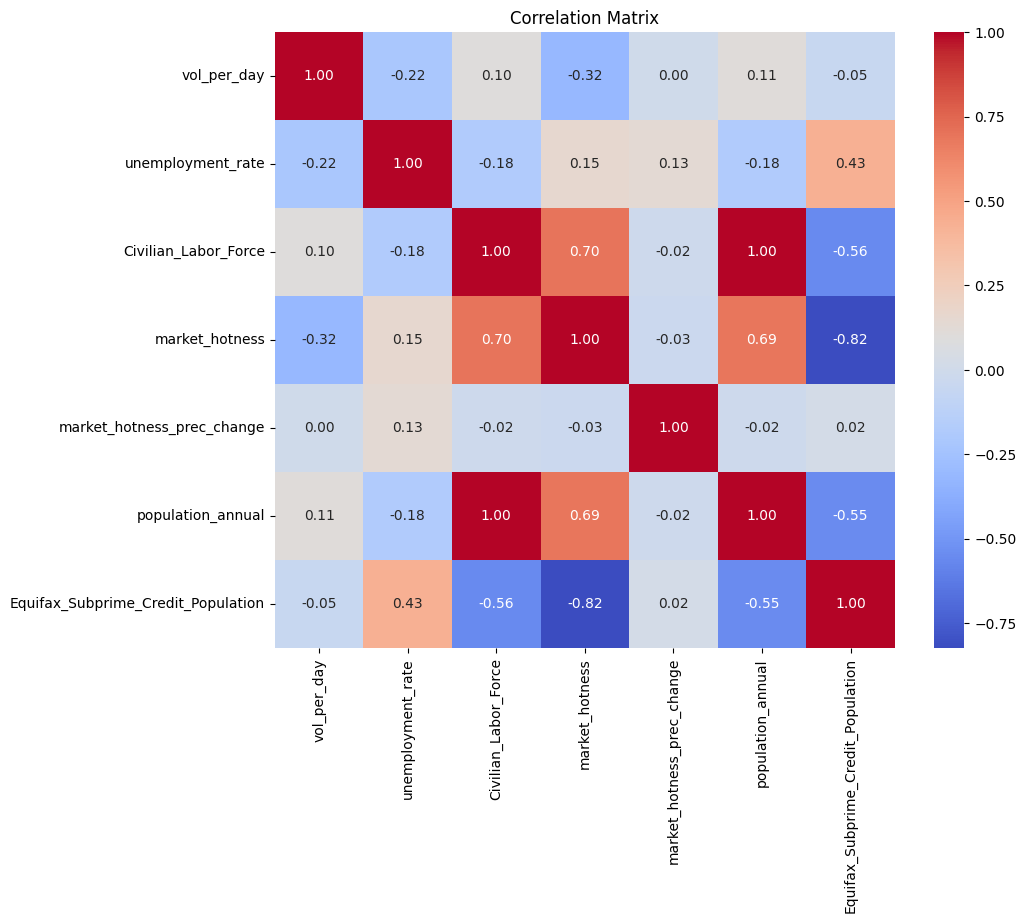

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

metric_col_l = ['vol_per_day', 'unemployment_rate', 'Civilian_Labor_Force'
                , 'market_hotness', 'market_hotness_prec_change', 'population_annual', 'Equifax_Subprime_Credit_Population']


# Calculate the correlation matrix
corr_matrix = analysis_data_df[metric_col_l].corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


---

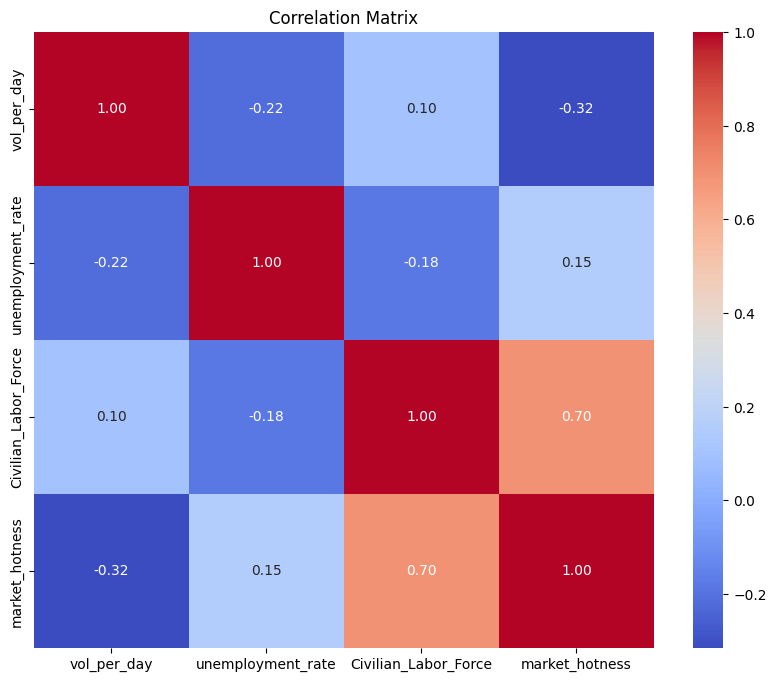

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

metric_col_l = ['vol_per_day', 'unemployment_rate', 'Civilian_Labor_Force', 'market_hotness']


# Calculate the correlation matrix
corr_matrix = analysis_data_df[metric_col_l].corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


**Market Analysis: Correlation with Trading Volume**

**Market Hotness (-0.32):**

  - There is a moderate negative correlation between volume per day and market hotness. This suggests that as market hotness increases, trading volume per day tends to decrease.

**Unemployment Rate (-0.22):**

  - There is a moderate negative correlation between volume per day and the unemployment rate.
  - This suggests that higher unemployment rates are associated with lower trading volumes per day.

**Population Annual(0.11):**

  - There is a very weak positive correlation between volume per day and the annual population.
  - Similar to the civilian labor force, this implies that changes in population size have minimal impact on traffic volume per day.

In summary, while the observed correlations are weak, they provide valuable insights into the potential influences of traffic volume.


In [ ]:
# @title Generate descriptive statistics for the numerical columns
descriptive_stats = analysis_data_df.describe()
descriptive_stats

,Year,Quarter,Month,vol_per_day,unemployment_rate,Civilian_Labor_Force,market_hotness,population_annual,Equifax_Subprime_Credit_Population
count,1424.000000,1424.000000,1424.000000,1424.000000,1359.000000,1359.000000,132.000000,1365.000000,761.000000
mean,2012.797051,2.443820,6.297051,3484.445659,5.145548,125728.325975,447985.752214,227.629938,26.431867
std,5.503104,1.036748,3.179271,4608.139431,2.103705,189247.045357,112523.883212,336.080504,6.044603
min,1986.000000,1.000000,1.000000,0.000000,1.000000,1169.000000,123700.000000,2.196000,13.333333
25%,2011.000000,2.000000,4.000000,315.314621,3.700000,9765.500000,399970.875000,22.070000,22.126437
50%,2014.000000,2.000000,6.000000,1790.576389,4.700000,22745.000000,481792.857150,51.261000,26.651891
75%,2016.000000,3.000000,9.000000,4681.865385,6.200000,172474.000000,516368.125000,305.531000,30.455868
max,2024.000000,4.000000,12.000000,24895.000000,18.000000,639202.000000,699000.000000,1149.688000,42.857143


---

Insights into the distribution of each numerical variable:

- Year, Quarter, Month: These indicate the time period for the data entries. The dataset ranges from the year 2017 to 2023, spread across all quarters and months.

- vol_per_day: The volume per day has a wide range, with a mean of approximately 3484, but the median (50th percentile) is much lower at about 1790, suggesting a skewed distribution with some very high values.

- unemployment_rate: The average unemployment rate is about 5.1%, with values ranging from 1% to a high of 18%, reflecting periods of possibly higher economic stress.

- Civilian_Labor_Force: Average size is about 125,728, but there's considerable variation, indicating a mix of data from different regions or sizes of labor markets.

- market_hotness: This seems to be a metric reflecting real estate or economic activity, with a mean value around 447,985. It also shows a wide range in values, suggesting different levels of market activity across regions or times.

- population_annual: Annual population figures average about 227,000, with a significant range, likely indicating that data is gathered from regions of different population sizes.

- Equifax_Subprime_Credit_Population: This measure ranges from 13% to 42% of the population, averaging around 26%, which may indicate the proportion of the population with lower credit ratings in different regions.

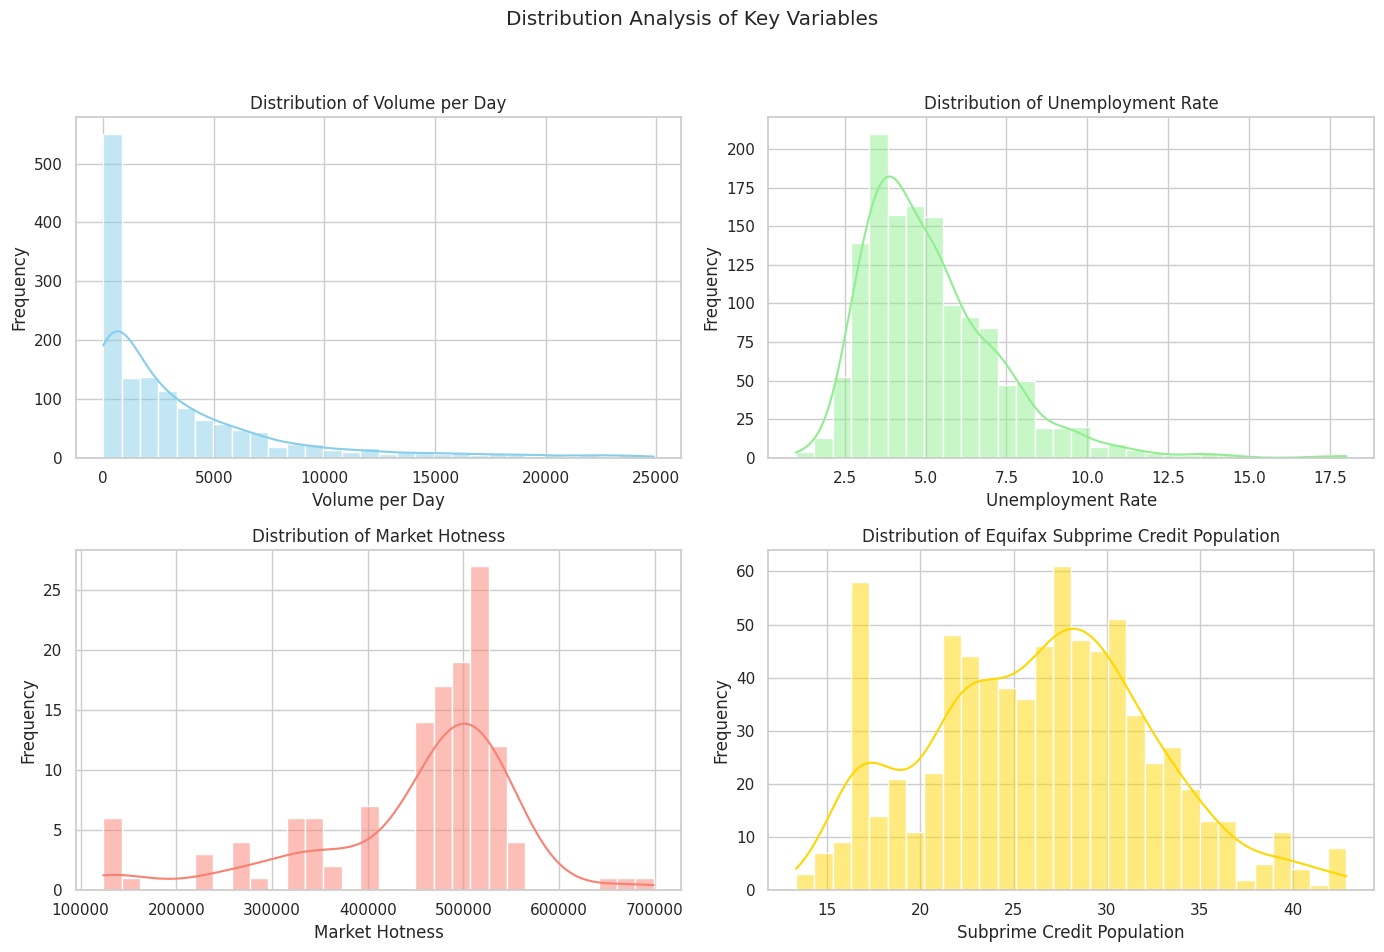

In [ ]:
# @title Distribution of variables

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a figure to hold the subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution Analysis of Key Variables')

# Plot histograms
sns.histplot(analysis_data_df['vol_per_day'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Volume per Day')
axes[0, 0].set(xlabel='Volume per Day', ylabel='Frequency')

sns.histplot(analysis_data_df['unemployment_rate'], bins=30, kde=True, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Distribution of Unemployment Rate')
axes[0, 1].set(xlabel='Unemployment Rate', ylabel='Frequency')

sns.histplot(analysis_data_df['market_hotness'], bins=30, kde=True, ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Distribution of Market Hotness')
axes[1, 0].set(xlabel='Market Hotness', ylabel='Frequency')

sns.histplot(analysis_data_df['Equifax_Subprime_Credit_Population'], bins=30, kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Distribution of Equifax Subprime Credit Population')
axes[1, 1].set(xlabel='Subprime Credit Population', ylabel='Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the title
plt.show()

## Research Question 1:
**How does road traffic volume vary across different regions and cities, and what factors contribute to these variations?**

In [ ]:
# Create a copy of the DataFrame for analysis
top_counties = analysis_data_df.copy()

# Filter out counties with less than 3 records to remove outliers
county_counts = top_counties['County'].value_counts()
counties_list_l = county_counts[county_counts > 3].index.to_list()

# Filter DataFrame to include only counties with at least 3 records
top_counties = top_counties[top_counties['County'].isin(counties_list_l)]

# Group the DataFrame by county, calculating mean traffic volume and population for each county
top_counties = top_counties.groupby(['County']).agg(
    traffic_volume=('vol_per_day', 'mean'),
    population_in_thousands =('population_annual', 'mean')
).dropna()

# Sort the DataFrame by traffic volume in descending order
top_counties = top_counties.sort_values(by='traffic_volume', ascending=False).reset_index()

# Select the top 10 counties based on traffic volume
top_10_counties = top_counties.head(10)

# Return the DataFrame with the top 10 counties
display(top_10_counties)


,County,traffic_volume,population_in_thousands
0,Hanover County,9709.611111,101.532588
1,Fairfax County,8250.705237,1037.766845
2,Spotsylvania County,7060.374853,123.257630
3,Prince William County,6615.703589,380.437119
4,Northampton County,6375.866667,12.404600
5,Chesterfield County,6231.992036,320.919000
6,Frederick County,6229.580343,81.365842
7,Accomack County,6229.376190,33.441600
8,Roanoke County,6101.997953,92.989000
9,Fauquier County,5827.066606,67.246385


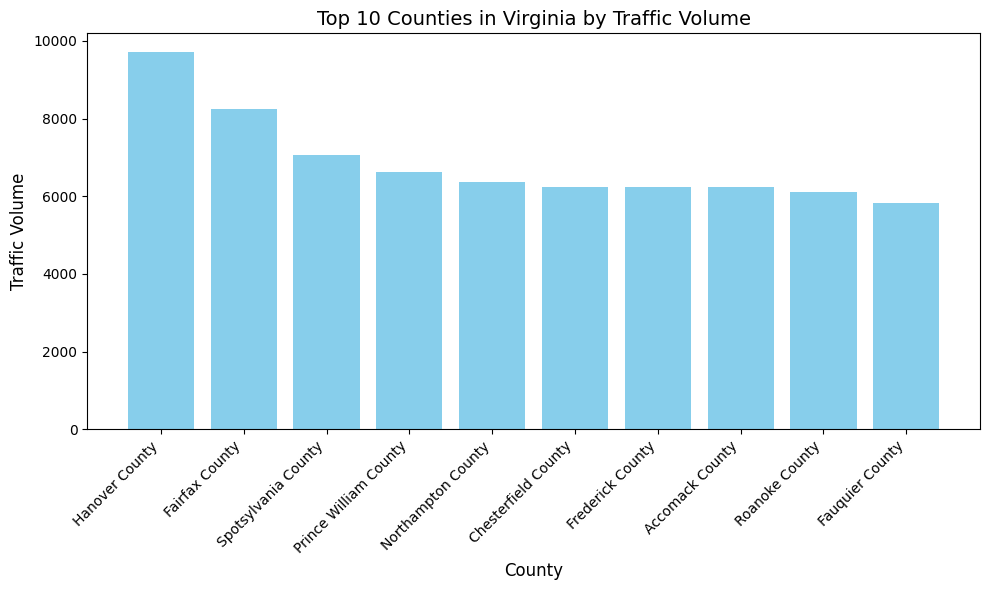

In [ ]:
# @title Bar chart of Traffic volume in Richmond County

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_counties['County'], top_10_counties['traffic_volume'], color='skyblue')
plt.xlabel('County', fontsize=12)
plt.ylabel('Traffic Volume', fontsize=12)
plt.title('Top 10 Counties in Virginia by Traffic Volume', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

Hanover County has the highest traffic movement in Virginia.

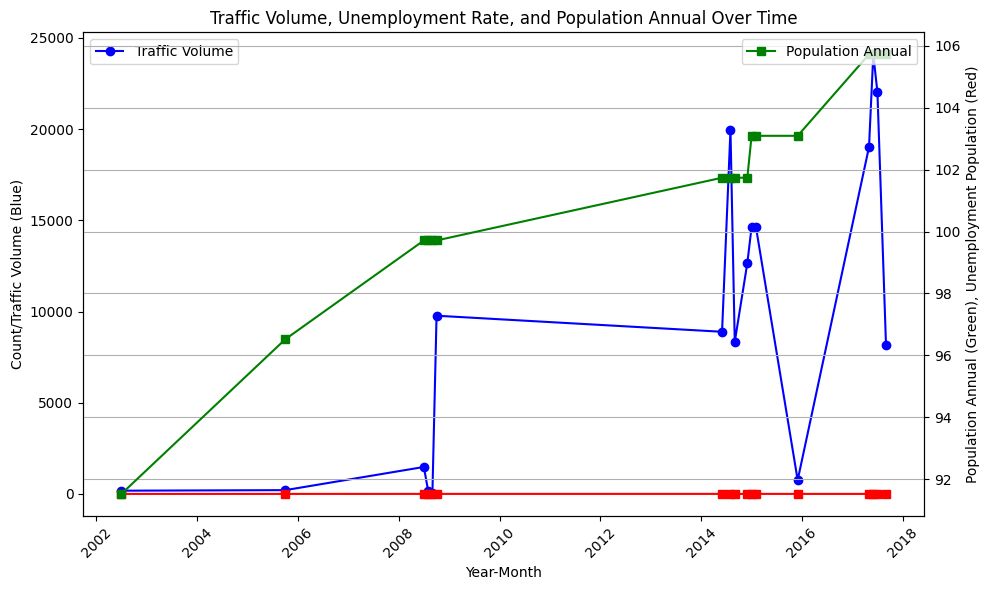

In [ ]:
# @title Time series plot of top county in virginia
import matplotlib.pyplot as plt

top_county_data_df = analysis_data_df[analysis_data_df['County'] == 'Hanover County']
top_county_data_df = top_county_data_df[['Year', 'Month', 'vol_per_day', 'unemployment_rate', 'population_annual']]
top_county_data_df['unemployment_pop'] = (top_county_data_df['unemployment_rate']*top_county_data_df['population_annual'])/100

# Convert 'year_month' to datetime format
top_county_data_df.index = pd.to_datetime(top_county_data_df.index)


# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot traffic volume and unemployment rate on the primary y-axis
ax1.plot(top_county_data_df.index, top_county_data_df['vol_per_day'], marker='o', color='b', label='Traffic Volume')

# Set labels and title for the primary y-axis
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Count/Traffic Volume (Blue)')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left')

# Create a secondary y-axis for population_annual
ax2 = ax1.twinx()
ax2.plot(top_county_data_df.index, top_county_data_df['population_annual'], marker='s', color='g', label='Population Annual')
ax1.plot(top_county_data_df.index, top_county_data_df['unemployment_pop'], marker='s', color='r', label='unemployed Population')
ax2.set_ylabel('Population Annual (Green), Unemployment Population (Red)')
ax2.legend(loc='upper right')

# Display the plot
plt.title('Traffic Volume, Unemployment Rate, and Population Annual Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

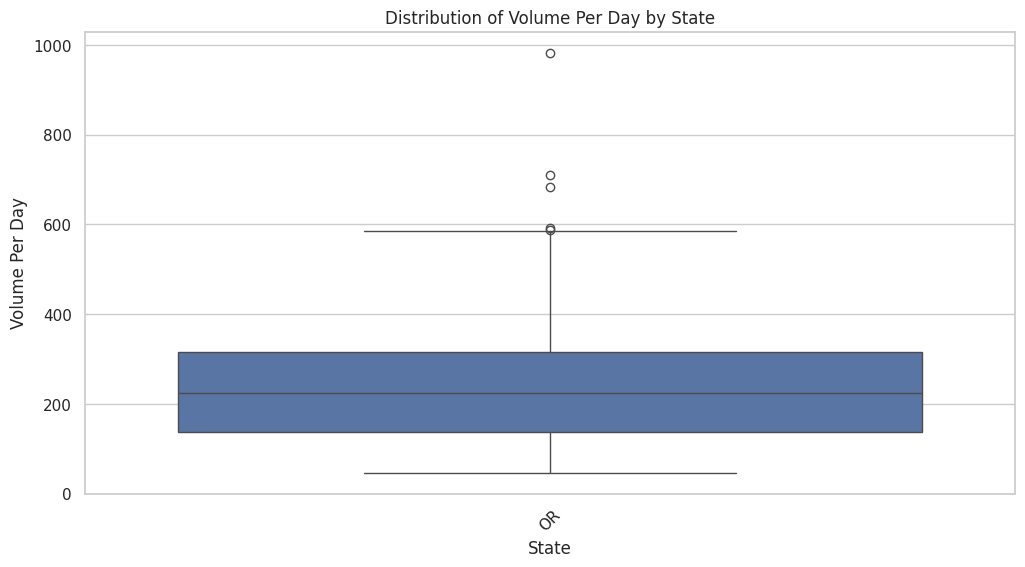

In [ ]:
#differences between groups (e.g., counties, states, or years) using boxplots to illustrate the distribution of
#vol_per_day across these categories, highlighting medians, quartiles, and outliers.

# Set up the visual appearance of our plots
sns.set(style="whitegrid")

# Creating a boxplot for vol_per_day by State
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='vol_per_day', data=data)
plt.title('Distribution of Volume Per Day by State')
plt.xlabel('State')
plt.ylabel('Volume Per Day')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

---

## Research Question 2
**Is there a correlation between road traffic volume and economic indicators such as GDP, employment rates, and consumer spending?**

To Explore this question we would be using linear regression to analyize the relationship between the traffic volumn and econometrics

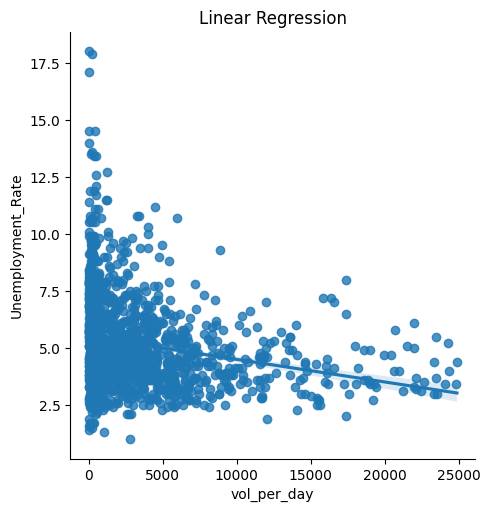

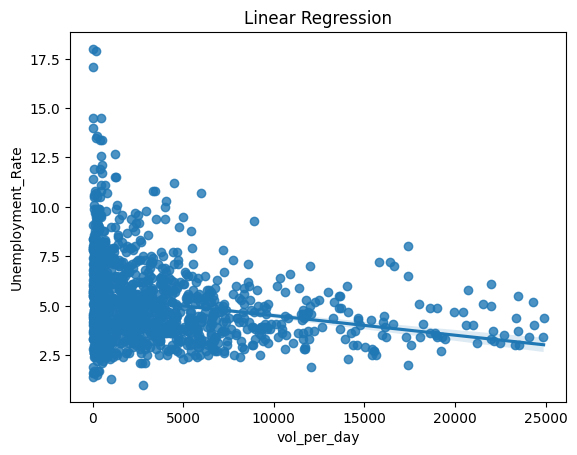

In [ ]:
# @title Linear Model

import seaborn as sns
import matplotlib.pyplot as plt

df = analysis_data_df.copy()
x_col ='vol_per_day'
y_col ='unemployment_rate'

# # Logging volums per day
# df[x_col] = np.log(df[x_col])

# Using lmplot
sns.lmplot(x=x_col, y=y_col, data=df)
plt.title('Linear Regression')
plt.xlabel('vol_per_day')
plt.ylabel('Unemployment_Rate')
plt.show()

# Using regplot
sns.regplot(x=x_col, y=y_col, data=df)
plt.title('Linear Regression')
plt.xlabel('vol_per_day')
plt.ylabel('Unemployment_Rate')
plt.show()

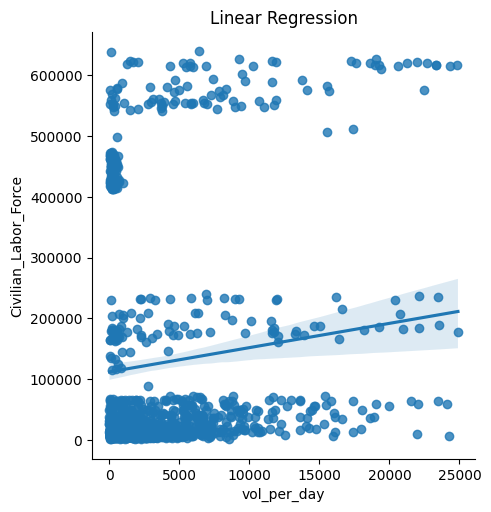

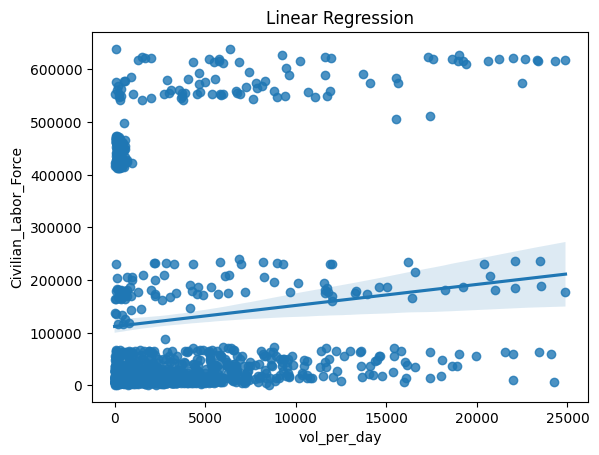

In [ ]:
# @title Linear Model

import seaborn as sns
import matplotlib.pyplot as plt

df = analysis_data_df.copy()
x_col ='vol_per_day'
y_col ='Civilian_Labor_Force'

# Logging volums per day
# df[x_col] = np.log(df[x_col])

# Using lmplot
sns.lmplot(x=x_col, y=y_col, data=df)
plt.title('Linear Regression')
plt.xlabel('vol_per_day')
plt.ylabel('Civilian_Labor_Force')
plt.show()

# Using regplot
sns.regplot(x=x_col, y=y_col, data=df)
plt.title('Linear Regression')
plt.xlabel('vol_per_day')
plt.ylabel('Civilian_Labor_Force')
plt.show()

In [ ]:
df.columns

Index(['Year', 'Quarter', 'Month', 'County', 'State', 'Country', 'vol_per_day',
       'unemployment_rate', 'Civilian_Labor_Force', 'market_hotness',
       'market_hotness_prec_change', 'population_annual',
       'Equifax_Subprime_Credit_Population', 'const'],
      dtype='object')

In [ ]:
# @title Regression Analysis

import numpy as np
import pandas as pd
import statsmodels.api as sm

# Assuming you have a DataFrame named 'df' with columns 'x' and 'y'
df = analysis_data_df.copy()


# Add a constant term for the intercept
df['const'] = 1
# # Logging volums per day
# df['log_vol_per_day'] = np.log(df['vol_per_day'])

# drop NA
df = df.dropna()

y_val_l = ['unemployment_rate', 'Civilian_Labor_Force'
                , 'market_hotness'
                # , 'market_hotness_prec_change'
                # , 'population_annual', 'Equifax_Subprime_Credit_Population'
                ]

X = df[['const', 'vol_per_day']]

for y_val in y_val_l:
  y = df[y_val]

  # Fit the regression model
  model = sm.OLS(y, X).fit()

  print(f'\n\n#####\n{y_val}:')

  # Print the regression results
  print(model.summary())



#####
unemployment_rate:
                            OLS Regression Results                            
Dep. Variable:      unemployment_rate   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     11.62
Date:                Thu, 09 May 2024   Prob (F-statistic):           0.000877
Time:                        01:36:44   Log-Likelihood:                -271.31
No. Observations:                 129   AIC:                             546.6
Df Residuals:                     127   BIC:                             552.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.3545 

### Unemployment Rate:
- **R-squared**:
The R-Squared is quite low, indicating that approximately 8.4% of the variability in the unemployment rate is explained by the predictor variable.
- **P-values**:
The F-statistic tests the overall significance of the model. A low p-value (in this case, 0.000877) suggests that the model as a whole is statistically significant.
- **Coefficient estimates**:
  - **const**:
  This is the intercept term of the regression equation. It indicates the expected value of the dependent variable when all independent variables are set to zero. Here, it's approximately 4.3545.
  - **vol_per_day**:
  This is the coefficient associated with the predictor variable. It indicates the change in the dependent variable (unemployment rate) for a one-unit change in the predictor variable (vol_per_day). In this case, for each unit increase in vol_per_day, the unemployment rate is expected to decrease by approximately 0.0001 units.
  - **Omnibus, Jarque-Bera, Skewness, Kurtosis**:
  These statistics test the normality of the residuals. A significant p-value in the Omnibus and Jarque-Bera tests suggests that the residuals are not normally distributed.
  - **Durbin-Watson**: This tests for autocorrelation in the residuals. Here, it's quite low (0.360), suggesting the possibility of positive autocorrelation.

### Civilian Labor Force:
- **R-squared**:
The R-Squared is quite low, indicating that approximately 32.1% of the variability in the Civilian Labor Force is explained by the predictor variable.
- **P-values**:
The F-statistic tests the overall significance of the model. A low p-value (in this case, 2.57e-12) suggests that the model as a whole is statistically significant.
- **Coefficient estimates**:
  - **const**: This is the intercept term of the regression equation. It indicates the expected value of the dependent variable when all independent variables are set to zero. Here, it's approximately 3.839e+05.
  - **vol_per_day**:
  The coefficient associated with the predictor variable indicates the change in the dependent variable (Civilian Labor Force) for a one-unit change in the predictor variable (vol_per_day). In this case, for each unit increase in vol_per_day, the Civilian Labor Force is expected to decrease by approximately 25.0869 units.
  - **Durbin-Watson**:
  This tests for autocorrelation in the residuals. Here, it's close to 2, suggesting no significant autocorrelation.

### Market Hotness:
- **R-squared**:
TIn this case, they are moderate, indicating that approximately 9.6% of the variability in market hotness is explained by the predictor variable.
- **P-values**:
 The F-statistic tests the overall significance of the model. A low p-value (in this case, 0.000340) suggests that the model as a whole is statistically significant.
- **Coefficient estimates**:
  - **const**:
  This is the intercept term of the regression equation. It indicates the expected value of the dependent variable when all independent variables are set to zero. Here, it's approximately 4.683e+05.
  - **log_vol_per_day**:
  This is the coefficient associated with the predictor variable. It indicates the change in the dependent variable (market hotness) for a one-unit change in the predictor variable (vol_per_day). In this case, for each unit increase in vol_per_day, the market hotness is expected to decrease by approximately 7.9359 units.
  - **Durbin-Watson**: This tests for autocorrelation in the residuals. Here, it's close to 2, suggesting no significant autocorrelation.

**Overall, each regression model shows statistical significance, their explanatory power varies. The unemployment rate model has relatively low explanatory power, while the Civilian Labor Force and Market Hotness models show moderate explanatory power.**

---

In [ ]:
# @title Regression Analysis [Loging volume]

import numpy as np
import pandas as pd
import statsmodels.api as sm

# Assuming you have a DataFrame named 'df' with columns 'x' and 'y'
df = analysis_data_df.copy()


# Add a constant term for the intercept
df['const'] = 1
# # Logging volums per day
df['log_vol_per_day'] = np.log(df['vol_per_day'])

# drop NA
df = df.dropna()

y_val_l = ['unemployment_rate', 'Civilian_Labor_Force'
                , 'market_hotness'
                # , 'market_hotness_prec_change'
                # , 'population_annual', 'Equifax_Subprime_Credit_Population'
                ]

X = df[['const', 'log_vol_per_day']]

for y_val in y_val_l:
  y = df[y_val]

  # Fit the regression model
  model = sm.OLS(y, X).fit()

  print(f'\n\n#####\n{y_val}:')

  # Print the regression results
  print(model.summary())



#####
unemployment_rate:
                            OLS Regression Results                            
Dep. Variable:      unemployment_rate   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     13.66
Date:                Thu, 09 May 2024   Prob (F-statistic):           0.000324
Time:                        01:37:18   Log-Likelihood:                -270.36
No. Observations:                 129   AIC:                             544.7
Df Residuals:                     127   BIC:                             550.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const          

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Logging the volume per day variable can be a good step in certain situation.

## Regression Analysis Results:
Results after performig log over Traffic volumn

### Unemployment Rate:
- **R-squared**:
The R-Squared is quite low, indicating that only about 9.7% of the variability in the unemployment rate is explained by the predictor variable.
- **P-values**:
The F-statistic tests the overall significance of the model. A low p-value (in this case, 0.000324) suggests that the model as a whole is statistically significant.
- **Coefficient estimates**:
  - **const**:
  The intercept term. When the vol_per_day variable is zero, the predicted value of the Unemployment Rate is approximately 5.0152.
  - **log_vol_per_day**:
  This is the coefficient associated with the predictor variable. It indicates the change in the dependent variable (unemployment rate) for a one-unit change in the predictor variable (log_vol_per_day). In this case, for each unit increase in log_vol_per_day, the unemployment rate is expected to decrease by approximately 0.3757 units.
  - **Durbin-Watson**: This tests for autocorrelation in the residuals. Here, it's quite low, suggesting the possibility of positive autocorrelation.

### Civilian Labor Force:
- **R-squared**: These metrics measure the goodness of fit of the model. In this case, they are relatively high, indicating that approximately 64.8% of the variability in the Civilian Labor Force is explained by the predictor variable.
- **P-values**: The F-statistic tests the overall significance of the model. A low p-value (in this case, 1.52e-30) suggests that the model as a whole is statistically significant.
- **Coefficient estimates**:
  - **const**: This is the intercept term of the regression equation. It indicates the expected value of the dependent variable when all independent variables are set to zero. Here, it's approximately 9.147e+05.
  - **log_vol_per_day**:
  The coefficient estimate for the log_vol_per_day variable. In this case, for each unit increase in log_vol_per_day, the Civilian Labor Force is expected to decrease by approximately 9.175e+04 units.
  - **Durbin-Watson**:
  This tests for autocorrelation in the residuals. Here, it's between 1 and 2, indicating no significant autocorrelation.

### Market Hotness:
- **R-squared**:
TIn this case, they are moderate, indicating that approximately 24.1% of the variability in market hotness is explained by the predictor variable.
- **P-values**:
 The F-statistic tests the overall significance of the model. A low p-value (in this case, 3.44e-09) suggests that the model as a whole is statistically significant.
- **Coefficient estimates**:
  - **const**:
  Here, it's approximately 6.577e+05.
  - **log_vol_per_day**:
  This is the coefficient associated with the predictor variable. It indicates the change in the dependent variable (market hotness) for a one-unit change in the predictor variable (log_vol_per_day). In this case, for each unit increase in log_vol_per_day, the market hotness is expected to decrease by approximately 3.231e+04 units.
  - **Durbin-Watson**: This tests for autocorrelation in the residuals. Here, it's between 1 and 2, indicating no significant autocorrelation.

**Overall, Each model shows statistical significance, but their explanatory power varies. The Civilian Labor Force model has the highest explanatory power, followed by the Market Hotness and Unemployment Rate models. Autocorrelation is not significant in the Civilian Labor Force and Market Hotness models but may be present in the Unemployment Rate model.**

---

# Timeseries Analysis

# Reserch Question 3
**Is there any event or change point in traffic volumes?**

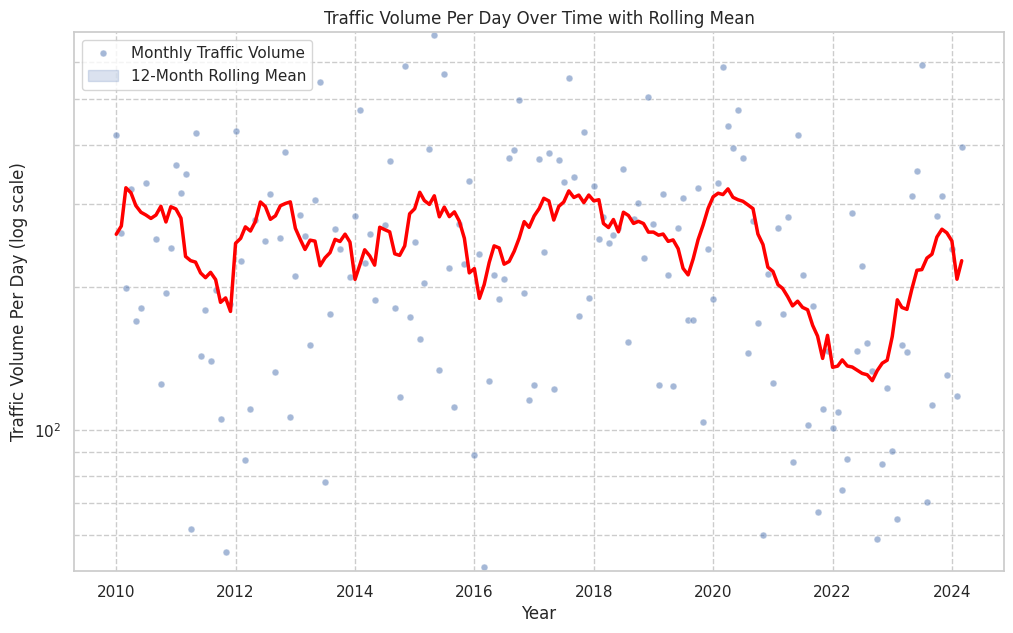

In [ ]:
# @title What trend can be observed in the traffic volume per day over the years
county_nm = 'Multnomah County'

# Load the dataset
data = analysis_data_df.copy()

# County Filter
data = data[data['County']==county_nm]

# Create a 'Date' column for better plotting, assuming DAY=1 for simplicity
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Drop the original Year and Month columns to avoid confusion
data = data.drop(columns=['Year', 'Month'])

# Sort the data by the Date column
data.sort_values('Date', inplace=True)

# Handle missing values by filling with median
data['vol_per_day'] = data['vol_per_day'].fillna(data['vol_per_day'].mean())

# Remove any potential duplicates after date conversion by averaging the volumes per day
data = data.groupby('Date').agg({'vol_per_day': 'mean'}).reset_index()

# Calculate the rolling mean with a 12-month window
data['Rolling_Mean'] = data['vol_per_day'].rolling(window=12, min_periods=1, center=True).mean()

# Set up the visual appearance of our plots
sns.set(style="whitegrid")

# Creating the time series plot for vol_per_day
plt.figure(figsize=(12, 7))

# Plotting the raw data with increased point size and added transparency
sns.lineplot(x='Date', y='vol_per_day', data=data, marker='o', linestyle='', markersize=5, alpha=0.5)

# Plotting the rolling mean with a thicker line
sns.lineplot(x='Date', y='Rolling_Mean', data=data, color='red', linewidth=2.5)

# Adjust the y-axis to handle the scale properly
plt.yscale('log')

# Adjust the limits of the y-axis to include only the 1st to 99th percentile to trim extreme outliers
vol_per_day_bounds = data['vol_per_day'].quantile([0.01, 0.99])
plt.ylim(vol_per_day_bounds[0.01], vol_per_day_bounds[0.99])

plt.title('Traffic Volume Per Day Over Time with Rolling Mean')
plt.xlabel('Year')
plt.ylabel('Traffic Volume Per Day (log scale)')
plt.grid(True, which="both", ls="--")  # Adding grid lines for log scale

# Adding a legend manually
plt.legend(['Monthly Traffic Volume', '12-Month Rolling Mean'])

plt.show()


The time series plot above illustrates the monthly traffic volume data alongside a 12-month rolling mean from 2010 to 2024.

- Blue Dots: Each dot represents the traffic volume for a particular month, plotted on a logarithmic scale. The use of the log scale helps in visually compressing the range of data values, making trends easier to identify when there's a wide variation in the data.
- Red Line: This line represents the 12-month rolling mean of traffic volume. The rolling mean is a type of moving average that helps smooth out short-term fluctuations and highlight longer-term trends or cycles in the data.
Key observations from the plot:

**Overall Trend:** There is a noticeable cyclical pattern in the traffic volume, with peaks and troughs occurring at regular intervals. This could be indicative of seasonal variations in traffic volume. Around 2020, there is a sharp drop in both the individual monthly values and the rolling mean, likely reflecting the impact of the COVID-19 pandemic on traffic volumes. Lastly, following the sharp drop in 2020, there appears to be a recovery phase where traffic volumes start to increase again, although they have not returned to pre-2020 levels by 2024.

This plot is useful for analyzing the impact of external factors on traffic volume and for planning infrastructure needs and traffic management policies based on observed patterns.

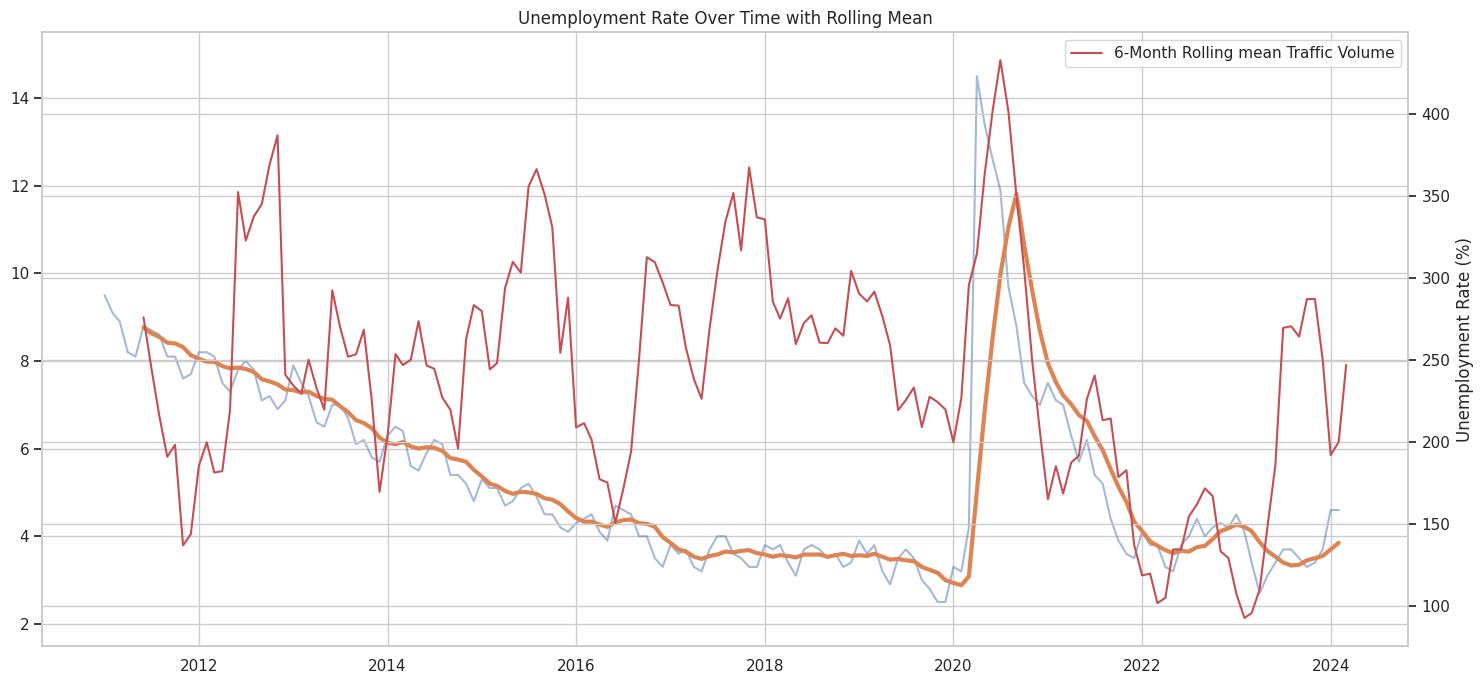

In [ ]:
# @title How has the unemployment rate changed over time, and can we detect any seasonal patterns?

county_nm = 'Multnomah County'

try:
  data_df = analysis_data_df.copy()

  # County Filter
  data_df = data_df[data_df['County']==county_nm]

  # Creating the 'Date' column again using Year and Month, assuming the first day of the month
  data_df = data_df[data_df['Year']>2010]
  data_df['Date'] = pd.to_datetime(data_df[['Year', 'Month']].assign(DAY=1))

  # group by
  data_df = data_df.groupby(['Date']).agg(vol_per_day = ('vol_per_day', 'mean'), unemployment_rate = ('unemployment_rate', 'mean')).reset_index()
  # Setting the 'Date' column as the index
  data_df.set_index('Date', inplace=True)

  # Sorting the data by date just in case
  data_df.sort_index(inplace=True)

  # Calculate the rolling mean for the unemployment_rate with a 12-month window
  data_df['unemployment_rate_rolling_mean'] = data_df['unemployment_rate'].rolling(window=6).mean()
  data_df['vol_per_day_mean'] = data_df['vol_per_day'].rolling(window=6).mean()

  plt.figure(figsize=(15, 7))

  # Calculate the valid range for the y-axis
  y_min = data_df['unemployment_rate'].min()
  y_max = data_df['unemployment_rate'].max()

  # Ensure that the y-axis limits are not NaN or infinity
  if not pd.isna(y_min) and not pd.isna(y_max):
      plt.ylim([max(y_min - 1, 0), y_max + 1])  # Set y-axis limits with a buffer



  # Plot the unemployment rate and the rolling mean
  plt.plot(data_df.index, data_df['unemployment_rate'], label='Unemployment Rate', marker='', alpha=0.5)
  plt.plot(data_df.index, data_df['unemployment_rate_rolling_mean'], label='6-Month Rolling Mean', linewidth=3)

  # Add the traffic volume data as a secondary y-axis
  ax2 = plt.gca().twinx()
  ax2.plot(data_df.index, data_df['vol_per_day_mean'], label='6-Month Rolling mean Traffic Volume', color='r')

  # Add titles and labels
  plt.title('Unemployment Rate Over Time with Rolling Mean')
  plt.xlabel('Date')
  plt.ylabel('Unemployment Rate (%)')

  # Show the legend and grid
  plt.legend()
  plt.grid(True)

  # Adjust layout and display the plot
  plt.tight_layout()
  plt.show()
except Exception as e:
  # If there's an error, print it out.
  print(f"An error occurred: {e}")


The above plot visualizes the changes in the unemployment rate over time for Multnomah County, alongside the 6-month rolling mean of both the unemployment rate and traffic volume. The data includes measures from the years post-2010.

**Plot Components:**

- Blue Line (Primary Y-axis): Shows the unemployment rate (%) over time. This line graph gives a clear visual indication of how the unemployment rate has fluctuated from 2012 to around 2024.

- Orange Line (Primary Y-axis): Represents the 6-month rolling mean of the unemployment rate. This smoothing technique helps identify trends by averaging out short-term fluctuations and highlighting longer-term trends in the unemployment data.

- Red Line (Secondary Y-axis): Displays the 6-month rolling mean of the traffic volume per day. This is plotted against the secondary y-axis, which likely has a different scale, to compare trends in traffic volume with changes in unemployment.


**Key Observations:**
- The unemployment rate exhibits significant spikes and drops. For instance, there is a notable peak around 2020, likely related to the COVID-19 pandemic's impact on employment.
- The plot also examines any potential correlation between unemployment rates and traffic volumes. Notably, there seems to be a peak in traffic volume that coincides with a sharp decrease in the unemployment rate around 2020, suggesting that as the economy recovered and more people returned to work, traffic volume increased.
- The unemployment rate shows some cyclicality, with peaks often followed by troughs. The rolling means help in observing these cycles more clearly.

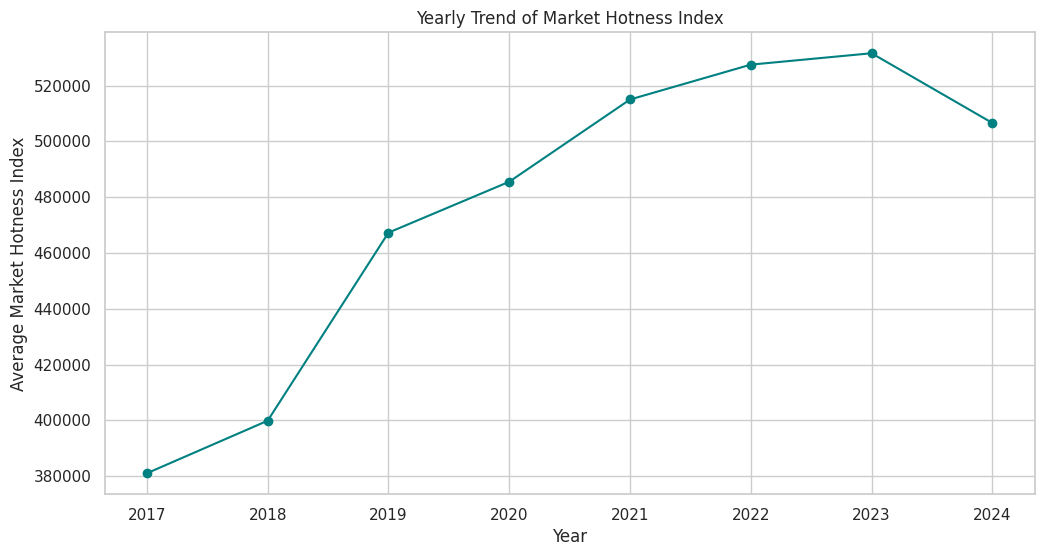

In [ ]:
#Is there a trend in the market hotness index over the years included in the dataset?

# Group by Year and calculate the mean of 'market_hotness'
yearly_hotness = analysis_data_df['market_hotness'].resample('Y').mean()

# Plotting the trend of yearly market hotness
plt.figure(figsize=(12, 6))
plt.plot(yearly_hotness.index.year, yearly_hotness, marker='o', linestyle='-', color='teal')
plt.title('Yearly Trend of Market Hotness Index')
plt.xlabel('Year')
plt.ylabel('Average Market Hotness Index')
plt.grid(True)
plt.show()

The plot illustrates the Yearly Trend of the Market Hotness Index from 2017 through 2024, showcasing a generally upward trajectory in market activity.

- **Overall Trend:** Starting in 2017, the market begins at a lower hotness index around 400,000, climbing steadily and quite impressively to reach just above 500,000 by 2021. This continuous rise over the initial years indicates a notably vibrant and increasingly attractive market environment.

- The peak of this wonderfully illustrated trend occurs in 2023, where the index slightly surpasses 520,000, showcasing the market's highest attractiveness and activity. However, following this peak, there's a slight, yet noticeable decline in 2024, suggesting a cooling off or perhaps a temporary stabilization of market conditions.

- The ascending trend followed by a minor decline could imply various underlying economic factors influencing the market's heat, such as changes in consumer behavior, shifts in housing demand and supply, or broader economic shifts. Such a detailed, yearly examination helps stakeholders gauge market conditions meticulously and predict future trends with greater accuracy.

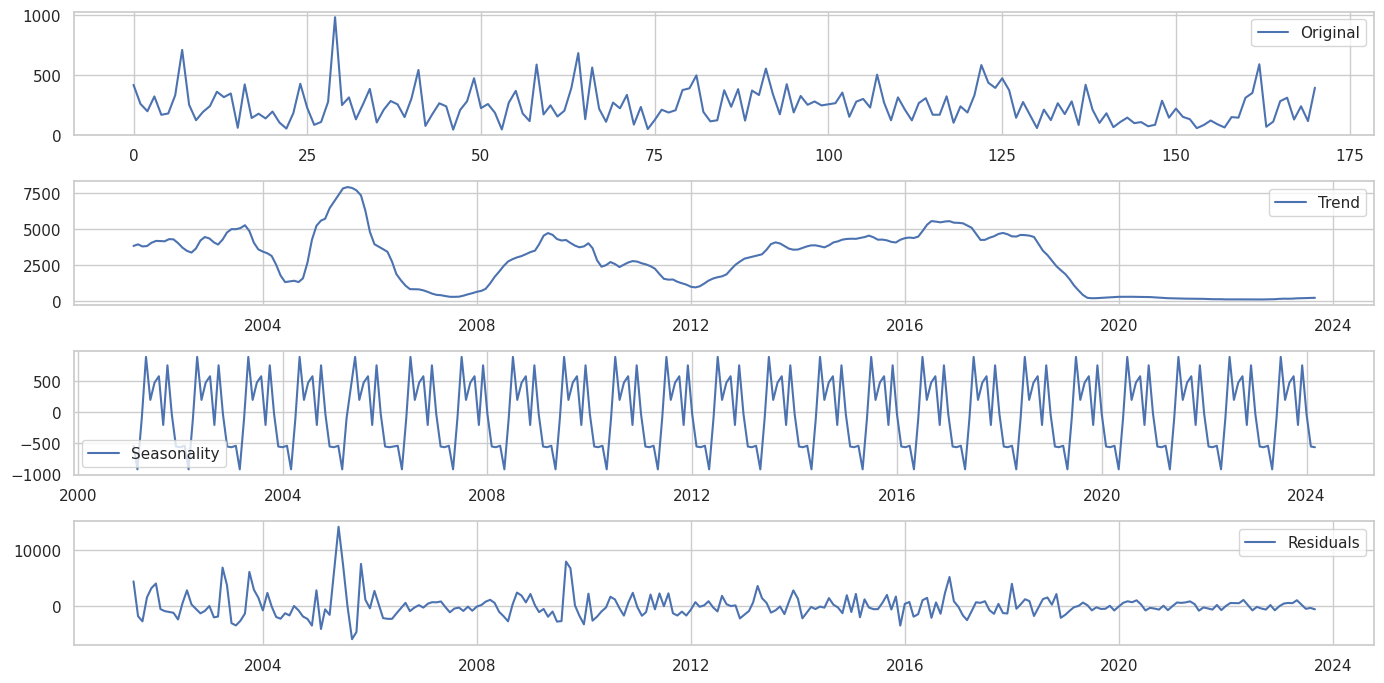

In [ ]:
#Does the volume per day exhibit any trends or cyclical behavior that can be identified?

from statsmodels.tsa.seasonal import seasonal_decompose

# Data
data_df = analysis_data_df.copy()

# data after 2000
data_df = data_df[data_df['Year']>2000]

# Group by take mean
data_df = data_df.groupby(level=0).agg(vol_per_day = ('vol_per_day', 'mean'))

# Ensure the data is sorted by date
data_df.sort_index(inplace=True)

# Make sure to fill any missing time periods if necessary, such as using forward-fill for missing days
data_df['vol_per_day'].fillna(method='ffill', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(data_df['vol_per_day'], model='additive', period=12)

# Plot the decomposed time series
plt.figure(figsize=(14, 7))
plt.subplot(411)
plt.plot(data['vol_per_day'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The plot represents the output of a seasonal decomposition analysis of a time series data on "volume per day" using the seasonal_decompose method from the statsmodels library in Python.

- Original Series (Top Panel): This is the raw time series data, showing the original "volume per day" values over time. The scale on the left indicates the magnitude of the volume, which varies over time, showing some periodic spikes.
- Trend Component (Second Panel): This graph shows the long-term trend extracted from the original data. It helps identify any overarching upwards or downwards movement over the years, smoothing out short-term fluctuations. The trend indicates some major changes over the years, with a notable peak around the mid-2000s and a general decline toward the later years.
- Seasonal Component (Third Panel): This part of the decomposition highlights the seasonal pattern within the data, repeated at regular intervals. The consistent up-and-down movement across each year suggests strong seasonal influences on the volume per day, which could be related to factors like tourism seasons, holidays, or other cyclical events.
- Residuals (Bottom Panel): These are the residuals of the model after the trend and seasonal components have been removed from the original data. Ideally, if the model has captured the trend and seasonality accurately, the residuals should resemble white noise (i.e., random fluctuations that don’t have any interpretable patterns left).

**Key Insights:**

- Trend Analysis: Identifying the trend helps in understanding long-term changes which might be due to structural changes in the population, economy, or industry.
- Seasonal Analysis: Understanding the seasonality can help in planning for expected increases or decreases in volume, which can be crucial for resource allocation and operational planning.
- Residual Analysis: Examining the residuals can help in checking the adequacy of the model. Any patterns here might suggest that some aspect of the trend or seasonal variation was not captured by the model

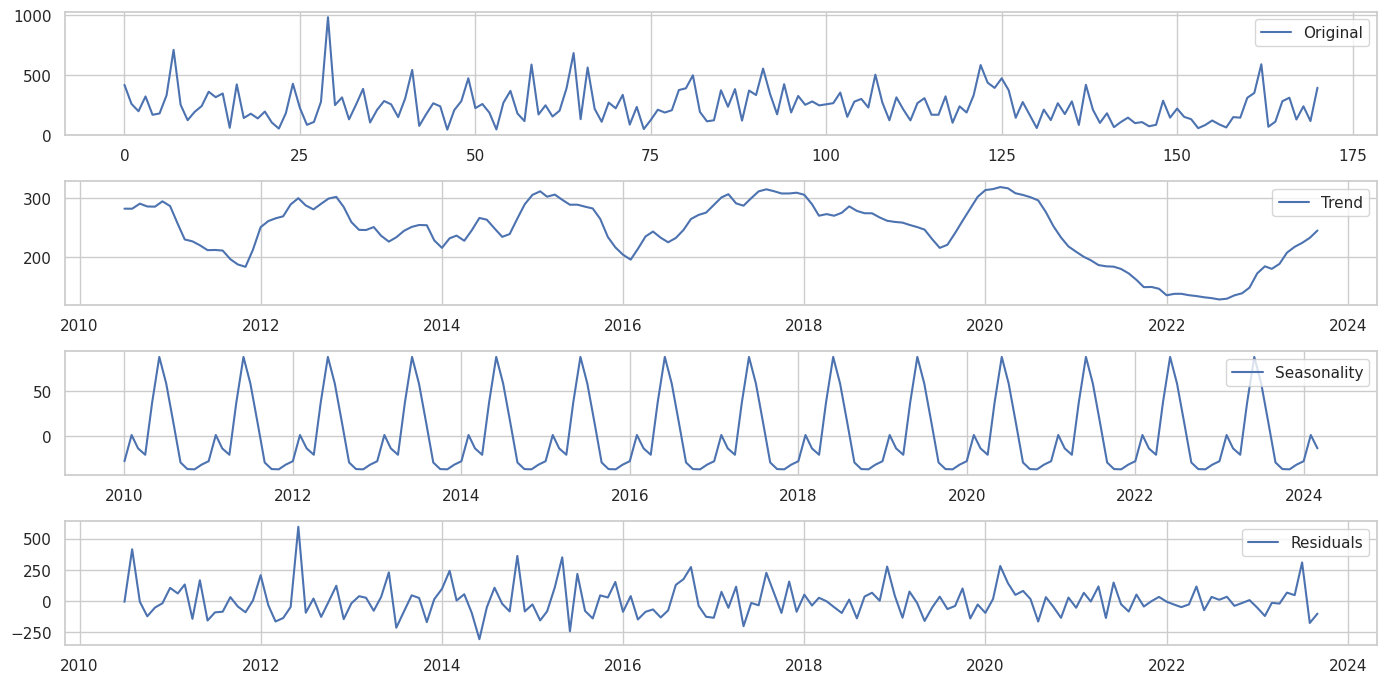

In [ ]:
#Does the volume per day exhibit any trends or cyclical behavior that can be identified?

from statsmodels.tsa.seasonal import seasonal_decompose

county_nm = 'Multnomah County'


data_df = analysis_data_df.copy()

# County Filter
data_df = data_df[data_df['County']==county_nm]

# data after 2000
data_df = data_df[data_df['Year']>2000]

# Group by take mean
data_df = data_df.groupby(level=0).agg(vol_per_day = ('vol_per_day', 'mean'))


# Ensure the data is sorted by date
data_df.sort_index(inplace=True)

# Make sure to fill any missing time periods if necessary, such as using forward-fill for missing days
data_df['vol_per_day'].fillna(method='ffill', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(data_df['vol_per_day'], model='additive', period=12)

# Plot the decomposed time series
plt.figure(figsize=(14, 7))
plt.subplot(411)
plt.plot(data['vol_per_day'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The chart shows the decomposition of a time series data representing traffic volume per day, for Multnomah County.

**Original Data (Top Panel):**

- The original data exhibits a cyclical pattern with regular peaks and troughs, suggesting a seasonal or periodic behavior.
- The amplitude of the cycles appears to be relatively consistent over time.


**Trend (Second Panel):**

- The trend line shows an overall decreasing pattern, indicating that the underlying trend of the data is declining over the time period analyzed.
- However, there are some periods where the trend seems to be increasing or relatively stable.


**Seasonality (Third Panel):**

- he seasonality plot clearly shows a repeating pattern with a period of approximately one year (12 months), confirming the presence of strong seasonal fluctuations in the data.
- The pattern appears to be consistent throughout the time period analyzed.


Residuals (Bottom Panel):

- The residuals represent the remaining variation in the data after accounting for the trend and seasonal components.
- The residuals exhibit a somewhat random pattern, suggesting that the seasonal decomposition has captured a significant portion of the systematic variation in the data.


Overall, the chart show that the traffic volume in Multnomah County exhibits a clear seasonal pattern with annual cycles, along with an underlying decreasing trend.

---

---

# Conclusion


Our analysis highlights Hanover County, Fairfax County, and Spotsylvania County as prominent centers of traffic activity within Virginia, ranking among the top counties in terms of traffic volume. These counties likely serve as key transportation hubs, reflecting urbanization, economic activity, and population density within the region.

Furthermore, regression analysis indicates correlations between road traffic volume and crucial economic indicators, including employment rates, Civilian Labor Force, and Market Hotness. These correlations suggest intertwined relationships between transportation dynamics and economic vitality, wherein factors such as workforce participation and market sentiment influence traffic volumes.

However, it is important to note that while correlations exist, the explanatory power of the regression models remains low. This implies that while economic indicators contribute to variations in road traffic volume, they do not fully account for the observed fluctuations. Other unmeasured variables or complex interactions may also influence traffic dynamics, contributing to the limited explanatory capacity of the models.

The time series analysis underscores the cyclical nature of traffic volume, impacted by seasonal fluctuations and notably declining during the COVID-19 pandemic, followed by gradual recovery phases. Moreover, correlations between traffic volume and economic indicators, like unemployment rates, reveal the influence of economic conditions on transportation demand. Additionally, seasonal decomposition analysis reaffirms the significance of understanding seasonal patterns in traffic volume for effective transportation planning and resource allocation. These findings emphasize the intricate interplay between traffic dynamics, economic factors, and market trends

In essence, while our analysis provides valuable insights into the relationships between road traffic volume and economic indicators, it also underscores the complexity of transportation systems and the multitude of factors influencing traffic patterns. Further research and analysis may be necessary to explore additional variables and refine our understanding of the dynamics driving traffic activity in the region.

---

# Reference


- What the Transportation Services Index, Dow Transportation Index, and Cass Freight Index Tell Us
https://www.bts.gov/topics/freight-transportation/technical-brief-what-transportation-services-index-dow-transportation

- Transportation Services Index and the Economy-Revisited by Peg Young, Ken Notis, Theresa Firestine. https://www.bts.gov/archive/publications/special_reports_and_issue_briefs/special_report/2014_12_10/entire


- Traffic Volume Data as an Economic Indicator by Raul Zamorano. https://www.linkedin.com/pulse/traffic-volume-data-economic-indicator-raul-zamorano/

- Swetha Magadi (2021) Macroeconomic Data Analysis with Time Series data using python, Medium https://medium.com/distros/probability-analysis-on-the-time-series-data-for-the-federal-reserve-bank-of-st-louis-using-python-f5aec57e47ce

**Library and Packages used:**
* Pandas https://pandas.pydata.org/
* Numpy https://numpy.org/
* Statsmodels https://www.statsmodels.org/stable/index.html
* Requests https://pypi.org/project/requests/
* Beautiful Soup: https://beautiful-soup-4.readthedocs.io/en/latest/
* gdown https://pypi.org/project/gdown/
* full-fred: https://www.piwheels.org/project/full-fred/





---
---
---

---
---
---

---
---